# Factors Analyzed for their Contributions to Heart Disease 
**Capstone 1 Report**

## Introduction

**Predicting heart disease risk**


*The problem*

Heart disease is one of the greatest causes of death, though it is not necessarily clear which patient health factors contribute most to risk of heart disease.


*Potential clients*

Understanding of the relative risks leading to heart disease would be useful to multiple stakeholders. The patient care community, as well as patients themselves, could benefit from awareness of specific risk factors. Insurers, whether private or publicly administered, would have an interest in knowing which factors make people vulnerable to heart disease and its outcomes, both to administer resources and to incentivize strategies to lead to optimal health. Heart disease is not simply a problem of industrialized nations, either, and non-governmental organizations could make use of knowledge of risk factors for treatment and prevention, including education, in areas where they are able to make an impact on public health. Publicly funded medical researchers and pharmaceutical companies could use information about the etiology of heart disease to develop treatments or preventive medications, since it is quite possible that heart disease is mediated not by lifestyle choices alone.


*Data sources*

Data used for this machine learning project come from the University of California, Irvine Machine Learning [Repository](http://archive.ics.uci.edu/ml/datasets/Heart+Disease). Datasets regarding heart disease risk factors are used here from three distinct patient populations, including Cleveland, Ohio (N=282), Long Beach, California (N=200), and Hungary (N=294). There are processed datasets available (examining 13 possible contributing factors, in addition to the target variable), but they do contain missing data to be addressed in the process of preparing the data for machine learning methods. 


*Project expectations*

The target variable to be predicted in our machine learning model is presence and level of heart disease, which is organized within the data as a classification system with five levels (including a category for absence of heart disease). We can choose a binomial, categorical classification system (heart disease diagnosis likely versus not) based on labeled data, and a supervised classification model would be a prudent approach for this. The model would include probability of categorization into either class. Alternatively, we can choose to categorize predictions into any of the five possible classes, using a multiclass classification approach with logistic regression, a neural network, or a decision forest. 

While it is useful to have three separate populations from two countries included in this data analysis, a caveat is that all will have come from Western, industrialized nations, possibly limiting the power of any model arising from this analysis to extrapolate into other regions of the world.
 
This project eventually will include development of the following items: codes for importation of data, data cleanup, exploratory data and inferential analyses, and model development. A project report and a slide deck summarizing the project and its findings will also be provided.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
import seaborn as sns
from IPython.display import display, HTML
from mpl_toolkits.axes_grid1 import make_axes_locatable
import itertools



locationrisk = [['Ohio', 7.62], ['Cleveland, OH', 8.76], ['California', 5.30], ['Long Beach, CA', 5.46]]
locationriskdf = pd.DataFrame(locationrisk)
locationriskdf.columns=['Location', 'Heart Disease Rate']
print('\033[1m \n Table 1. Heart disease rates in key locations (from CDC.gov)')
display(HTML(locationriskdf.to_html(index=False)))

 
 Table 1. Heart disease rates in key locations (from CDC.gov)


Location,Heart Disease Rate
Ohio,7.62
"Cleveland, OH",8.76
California,5.30
"Long Beach, CA",5.46


Table 1 shows rates of heart disease in locations from the United States that are relevant to this study, from data collected by the United States Centers for Disease Control. The rate comes from a prevalence calculated as described [here](https://www.cdc.gov/500cities/definitions/health-outcomes.htm#CHD). Statewide, Ohio shows a higher rate of heart disease than does California, while within these states Cleveland, Ohio, seems to show a higher rate of heart disease than does Ohio, and Long Beach, California, seems to show a rate of heart disease comparable to the rate for California.
___

## Data description and cleanup
*Data sources*

The data for this analysis comes from three datasets that each contain the same columns of information, and the datasets are available from the University of California, Irvine Machine Learning [Repository](http://archive.ics.uci.edu/ml/datasets/Heart+Disease). The variables (listed in Table 2 according to definitions that accompany the datasets) encompassed by these data include years of age (age), sex (sex), chest pain type (cp), resting blood pressure (trestbps), cholesterol (chol), fasting blood sugar (fbs), resting electrocardiographic results (restecg), maximum heart rate (thalach), exercise-induced angina (exang), ST depression induced by exercise and relative to rest (oldpeak), slope of the peak exercise ST segment (slope), coronary angiography score (ca), thalassemia defect (thal), and numerical score (num) representing the degree of heart disease detected by angiography. This last value is the target variable.  

This list consists of both discrete variables and continuous variables. Age, trestbps, chol, thalach, and oldpeak are continuous variables, while the remaining variables are categorical in nature. The target variable, num, is a categorical variable on a scale of 0 to 5, with 0 meaning no heart disease and 5 being the level of greatest severity.



In [2]:
variables = [['age','age'], ['sex','sex'], ['cp','chest pain type'], ['trestpbs','resting blood pressure'], 
             ['chol','cholesterol level'], ['fbs','fasting blood sugar'], 
             ['restecg','resting electrocardiographic results'], ['thalach','maximum heart rate'],
            ['exang','exercise-induced angina'], ['oldpeak','ST depression induced by exercise and relative to rest'],
            ['slope','slope of the peak exercise ST segment'], ['ca','coronary angiography score'], 
            ['thal','thalassemia defect'], ['num','numerical heart disease score']]
variablesdf = pd.DataFrame(variables)
variablesdf.columns=['Variable Name', 'Definition of Variable (from UCI Machine Learning Repository)']
print('\033[1m \n Table 2. Heart disease feature names and their abbreviations')
pd.set_option('display.max_colwidth', 70)
display(HTML(variablesdf.to_html(index=False)))


 
 Table 2. Heart disease feature names and their abbreviations


Variable Name,Definition of Variable (from UCI Machine Learning Repository)
age,age
sex,sex
cp,chest pain type
trestpbs,resting blood pressure
chol,cholesterol level
fbs,fasting blood sugar
restecg,resting electrocardiographic results
thalach,maximum heart rate
exang,exercise-induced angina
oldpeak,ST depression induced by exercise and relative to rest


*Data cleanup*

The missing values were originally denoted differently according to data file. The code for a missing value in data from the Cleveland, OH, and Long Beach, CA, datasets was a "?", and a missing value in the Hungarian dataset (reprocessed, used here) was denoted as "-9.0". In each case, a missing values was replaced with "NaN" prior to further processing. Initially datatypes were all treated as floats for flexibility in assigning NaN entries, but later the datatypes were altered as appropriate for the data. 

After replacing missing values with NaN's, the next step was to examine data distributions for each variable by viewing histograms to assess whether values show normal distributions, and to identify if there were obvious and inappropriate outliers (for instance, a missing value that should have been noted as "-9.0" but was entered as "9.0" for a categorical variable whose values were not to exceed 3). Additionally, getting an idea of the nature of a variable enabled the decision whether to assign missing values the median or mode of population values for the variable. In general, if a variable showed a relatively normal distribution, particularly for continuous data, then the median was used to assign to missing values. If a variable was not distributed in this way, particularly for categorical data, the mode was typically chosen. Exceptions to this method of value-assignment were allowed as seemed appropriate for a variable, and all are subject change as appropriate according to machine learning model development. This step of value-assignment for missing values was taken prior to consolidating data among populations in case there were location-based differences in median or mode, which seemed likely given that histograms identified slight variation in populations for some variables. For the "num" variable, one entry was removed from the Hungarian dataset prior to dataset consolidation due to a single missing value, and for all datasets the "num" datatype was adjusted as an integer datatype. 

Next, the datasets for each population were consolidated into a single dataframe (named "all_three_df"). A new column was added with the location information for each entry for future reference. It should be noted that of all the source files, the Cleveland dataset was initially the most complete with the least missing values, so this population has potential to influence overall analyses most highly.

After consolidation of all data into a single dataframe, datatypes were adjusted if needed for the nature of the data in each column. Continuous variables were kept as floats, and categorical data were converted to integers to allow for flexibility with calculations with the data (rather than set to categorical or boolean values at this point). 

In [2]:
#Data import, cleaning steps, and consolidation. Code for info, head, and component histograms are available here,
#but coded out so as to simplify output. However, they can be viewed in output by removing sets of triple quotation
#marks.

#___________________________________________cleveland import_______________________________________________________________________________________________________
cleveland_df = pd.read_csv('/Users/vickimoore/Desktop/Springboard/UCIheartdiseasedata/UCI_heart_newDL/Processed/processed_cleveland_data.csv', header=None, na_values = '?')
cleveland_df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
cleveland_df['sex'] = cleveland_df['sex'].astype(float)
cleveland_df['cp'] = cleveland_df['cp'].astype(float)
cleveland_df['fbs'] = cleveland_df['fbs'].astype(float)
cleveland_df['restecg'] = cleveland_df['restecg'].astype(float)
cleveland_df['exang'] = cleveland_df['exang'].astype(float)
cleveland_df['slope'] = cleveland_df['slope'].astype(float)
cleveland_df['ca'] = cleveland_df['ca'].astype(float) #throws errors over the NaN for int, just changing these to floats for now
cleveland_df['thal'] = cleveland_df['thal'].astype(float)
cleveland_df.insert(0, 'location', 'Cleveland')

print('cleveland')
print(cleveland_df.head()) 
print(cleveland_df.columns) 
print(cleveland_df.info()) 



#___________________________________________hungarian import_______________________________________________________________________________________________________
hungarian_df = pd.read_csv('/Users/vickimoore/Desktop/Springboard/UCIheartdiseasedata/UCI_heart_newDL/Processed/reprocessed_hungarian_data.txt', sep=" ", header=None, na_values = '-9.0')
hungarian_df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
hungarian_df['sex'] = hungarian_df['sex'].astype(float)
hungarian_df['cp'] = hungarian_df['cp'].astype(float)
hungarian_df['fbs'] = hungarian_df['fbs'].astype(float)
hungarian_df['restecg'] = hungarian_df['restecg'].astype(float)
hungarian_df['exang'] = hungarian_df['exang'].astype(float)
hungarian_df['slope'] = hungarian_df['slope'].astype(float)
hungarian_df['ca'] = hungarian_df['ca'].astype(float)
hungarian_df['thal'] = hungarian_df['thal'].astype(float)
hungarian_df = hungarian_df[np.isfinite(hungarian_df['num'])]
hungarian_df['num'] = hungarian_df['num'].astype(int)
hungarian_df.insert(0, 'location', 'Hungary')
'''
print('hungarian')
print(hungarian_df.head()) 
print(hungarian_df.columns) 
print(hungarian_df.info()) 
'''

#___________________________________________long beach import_______________________________________________________________________________________________________
long_beach_df = pd.read_csv('/Users/vickimoore/Desktop/Springboard/UCIheartdiseasedata/UCI_heart_newDL/Processed/processed_va_data.csv', header=None, na_values = '?')
long_beach_df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
long_beach_df['age'] = long_beach_df['age'].astype(float)
long_beach_df['fbs'] = long_beach_df['fbs'].astype(float)
long_beach_df['exang'] = long_beach_df['exang'].astype(float)
long_beach_df['slope'] = long_beach_df['slope'].astype(float)
long_beach_df['ca'] = long_beach_df['ca'].astype(float)
long_beach_df['thal'] = long_beach_df['thal'].astype(float)
long_beach_df.insert(0, 'location', 'Long_Beach')
'''
print('long beach')
print(long_beach_df.head()) 
print(long_beach_df.columns) 
print(long_beach_df.info()) 
'''

#get rid of any entry with NaN in num.
cleveland_df = cleveland_df[np.isfinite(cleveland_df['num'])]
hungarian_df = hungarian_df[np.isfinite(hungarian_df['num'])]
long_beach_df = long_beach_df[np.isfinite(long_beach_df['num'])]


#___________________________________________ca distribution and fix na in hungarian, switch out NaN's_______________________________________________________________________________________________________
'''
cleveland_df['ca'].plot(kind='hist', color='blue')
plt.show()
hungarian_df['ca'].plot(kind='hist', color='red')
plt.show()
long_beach_df['ca'].plot(kind='hist', color='purple')
plt.show()

print(hungarian_df['ca'][30:50])
hungarian_df['ca'][39] = np.nan
print(hungarian_df['ca'][30:50])
cleveland_df['ca'].plot(kind='hist', color='blue')
plt.show()
hungarian_df['ca'].plot(kind='hist', color='red')
plt.show()
long_beach_df['ca'].plot(kind='hist', color='purple')
plt.show()
print('ca')
cleveland_df['ca'].plot(kind='hist', color='blue')
hungarian_df['ca'].plot(kind='hist', color='red')
long_beach_df['ca'].plot(kind='hist', color='purple')
plt.show()
'''

# ca was discrete and non-normal. use mode.
ca_mode_cleveland = cleveland_df.ca.mode()
cleveland_df['ca'] = cleveland_df.ca.fillna(ca_mode_cleveland[0])
#print(cleveland_df.info())
ca_mode_hungarian = hungarian_df.ca.mode()
hungarian_df['ca'] = hungarian_df.ca.fillna(ca_mode_hungarian[0])
#print(hungarian_df.info())
ca_mode_long_beach = long_beach_df.ca.mode()
long_beach_df['ca'] = long_beach_df.ca.fillna(ca_mode_long_beach[0])
'''
print(long_beach_df.info())
print('age')
cleveland_df['age'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['age'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['age'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#dist varies by pop but overall mostly normal, slight skew to right. continuous var. will use median for missing.
age_median_cleveland = cleveland_df.age.median()
cleveland_df['age'] = cleveland_df.age.fillna(age_median_cleveland)
age_median_hungarian = hungarian_df.age.median()
hungarian_df['age'] = hungarian_df.age.fillna(age_median_hungarian)
age_median_long_beach = long_beach_df.age.median()
long_beach_df['age'] = long_beach_df.age.fillna(age_median_long_beach)
'''
print('sex')
cleveland_df['sex'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['sex'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['sex'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#discrete and non-normal. mostly male. use mode for right now, subject to change.
sex_mode_cleveland = cleveland_df.sex.mode()
cleveland_df['sex'] = cleveland_df.sex.fillna(sex_mode_cleveland[0])
sex_mode_hungarian = hungarian_df.sex.mode()
hungarian_df['sex'] = hungarian_df.sex.fillna(sex_mode_hungarian[0])
sex_mode_long_beach = long_beach_df.sex.mode()
long_beach_df['sex'] = long_beach_df.sex.fillna(sex_mode_long_beach[0])
'''
print('cp')
cleveland_df['cp'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['cp'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['cp'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#discrete and non-normal, but hungarian looks different from others. either median or mode, not sure yet. just go with median right now.
cp_median_cleveland = cleveland_df.cp.median()
cleveland_df['cp'] = cleveland_df.cp.fillna(cp_median_cleveland)
cp_median_hungarian = hungarian_df.cp.median()
hungarian_df['cp'] = hungarian_df.cp.fillna(cp_median_hungarian)
cp_median_long_beach = long_beach_df.cp.median()
long_beach_df['cp'] = long_beach_df.cp.fillna(cp_median_long_beach)
'''
print('trestbps')
cleveland_df['trestbps'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['trestbps'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['trestbps'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#continuous and close enough to normal. use median.
trestbps_median_cleveland = cleveland_df.trestbps.median()
cleveland_df['trestbps'] = cleveland_df.trestbps.fillna(trestbps_median_cleveland)
trestbps_median_hungarian = hungarian_df.trestbps.median()
hungarian_df['trestbps'] = hungarian_df.trestbps.fillna(trestbps_median_hungarian)
trestbps_median_long_beach = long_beach_df.trestbps.median()
long_beach_df['trestbps'] = long_beach_df.trestbps.fillna(trestbps_median_long_beach)
'''
print('chol')
cleveland_df['chol'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['chol'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['chol'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#continuous and close enough to normal. use median.
chol_median_cleveland = cleveland_df.chol.median()
cleveland_df['chol'] = cleveland_df.chol.fillna(chol_median_cleveland)
chol_median_hungarian = hungarian_df.chol.median()
hungarian_df['chol'] = hungarian_df.chol.fillna(chol_median_hungarian)
chol_median_long_beach = long_beach_df.chol.median()
long_beach_df['chol'] = long_beach_df.chol.fillna(chol_median_long_beach)
'''
print('fbs')
cleveland_df['fbs'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['fbs'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['fbs'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#discrete and non-normal. vast majority one value. use mode.
fbs_mode_cleveland = cleveland_df.fbs.mode()
cleveland_df['fbs'] = cleveland_df.fbs.fillna(fbs_mode_cleveland[0])
fbs_mode_hungarian = hungarian_df.fbs.mode()
hungarian_df['fbs'] = hungarian_df.fbs.fillna(fbs_mode_hungarian[0])
fbs_mode_long_beach = long_beach_df.fbs.mode()
long_beach_df['fbs'] = long_beach_df.fbs.fillna(fbs_mode_long_beach[0])
'''
print('restecg')
cleveland_df['restecg'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['restecg'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['restecg'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#looks discrete and non-normal. varies by population. 
#unclear whether median or mode best yet. just go with median right now.
restecg_median_cleveland = cleveland_df.restecg.median()
cleveland_df['restecg'] = cleveland_df.restecg.fillna(restecg_median_cleveland)
restecg_median_hungarian = hungarian_df.restecg.median()
hungarian_df['restecg'] = hungarian_df.restecg.fillna(restecg_median_hungarian)
restecg_median_long_beach = long_beach_df.restecg.median()
long_beach_df['restecg'] = long_beach_df.restecg.fillna(restecg_median_long_beach)
'''
print('thalach')
#sns.set()
#sns.distplot(cleveland_df['thalach'], color='blue', hist=True, bins=10, fit=norm)
#sns.distplot(hungarian_df['thalach'], color='red', hist=True, bins=10, fit=norm)
#sns.distplot(long_beach_df['thalach'], color='purple', hist=True, bins=10, fit=norm)
cleveland_df['thalach'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['thalach'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['thalach'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#continuous but dist depends on population. use median for now.
thalach_median_cleveland = cleveland_df.thalach.median()
cleveland_df['thalach'] = cleveland_df.thalach.fillna(thalach_median_cleveland)
thalach_median_hungarian = hungarian_df.thalach.median()
hungarian_df['thalach'] = hungarian_df.thalach.fillna(thalach_median_hungarian)
thalach_median_long_beach = long_beach_df.thalach.median()
long_beach_df['thalach'] = long_beach_df.thalach.fillna(thalach_median_long_beach)
'''
print('exang')
cleveland_df['exang'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['exang'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['exang'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#exang discrete and non-normal, but depends on pop. probably use mode for each pop.
exang_mode_cleveland = cleveland_df.exang.mode()
cleveland_df['exang'] = cleveland_df.exang.fillna(exang_mode_cleveland[0])
exang_mode_hungarian = hungarian_df.exang.mode()
hungarian_df['exang'] = hungarian_df.exang.fillna(exang_mode_hungarian[0])
exang_mode_long_beach = long_beach_df.exang.mode()
long_beach_df['exang'] = long_beach_df.exang.fillna(exang_mode_long_beach[0])
'''
print('oldpeak')
cleveland_df['oldpeak'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['oldpeak'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['oldpeak'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#continuous but non-normal, skewed to 0. use mode or median, use median for now.
oldpeak_median_cleveland = cleveland_df.oldpeak.median()
cleveland_df['oldpeak'] = cleveland_df.oldpeak.fillna(oldpeak_median_cleveland)
oldpeak_median_hungarian = hungarian_df.oldpeak.median()
hungarian_df['oldpeak'] = hungarian_df.oldpeak.fillna(oldpeak_median_hungarian)
oldpeak_median_long_beach = long_beach_df.oldpeak.median()
long_beach_df['oldpeak'] = long_beach_df.oldpeak.fillna(oldpeak_median_long_beach)
'''
print('slope')
cleveland_df['slope'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['slope'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['slope'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#discrete and non-normal but not really skewed. use median.
slope_median_cleveland = cleveland_df.slope.median()
cleveland_df['slope'] = cleveland_df.slope.fillna(slope_median_cleveland)
slope_median_hungarian = hungarian_df.slope.median()
hungarian_df['slope'] = hungarian_df.slope.fillna(slope_median_hungarian)
slope_median_long_beach = long_beach_df.slope.median()
long_beach_df['slope'] = long_beach_df.slope.fillna(slope_median_long_beach)
'''
print('thal')
cleveland_df['thal'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['thal'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['thal'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#discrete and non-normal. but evenly split. maybe median? 
#just to keep with current convention of erring on side of median, use median right now.
thal_median_cleveland = cleveland_df.thal.median()
cleveland_df['thal'] = cleveland_df.thal.fillna(thal_median_cleveland)
thal_median_hungarian = hungarian_df.thal.median()
hungarian_df['thal'] = hungarian_df.thal.fillna(thal_median_hungarian)
thal_median_long_beach = long_beach_df.thal.median()
long_beach_df['thal'] = long_beach_df.thal.fillna(thal_median_long_beach)
'''
#TARGET variable is num
print('num')
cleveland_df['num'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['num'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['num'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
cleveland_df['num'].plot(kind='hist', color='blue')
plt.show()
hungarian_df['num'].plot(kind='hist', color='red')
plt.show()
long_beach_df['num'].plot(kind='hist', color='purple')
plt.show()
'''
#added location columns to each up above so as to combine files here.
all_three_df = pd.concat([cleveland_df, hungarian_df, long_beach_df], ignore_index=True)
all_three_df = all_three_df[np.isfinite(all_three_df['num'])]
#print(all_three_df)
#___________________________________________set dtypes_____________________________________________________________________________________________________________
all_three_df['location'] = all_three_df['location'].astype(str)
all_three_df['age'] = all_three_df['age'].astype(float)
all_three_df['sex'] = all_three_df['sex'].astype(int)
all_three_df['cp'] = all_three_df['cp'].astype(int)
all_three_df['trestbps'] = all_three_df['trestbps'].astype(float)
all_three_df['chol'] = all_three_df['chol'].astype(float)
all_three_df['fbs'] = all_three_df['fbs'].astype(int)
all_three_df['restecg'] = all_three_df['restecg'].astype(int)
all_three_df['thalach'] = all_three_df['thalach'].astype(float)
all_three_df['exang'] = all_three_df['exang'].astype(int)
all_three_df['oldpeak'] = all_three_df['oldpeak'].astype(float)
all_three_df['slope'] = all_three_df['slope'].astype(int)
all_three_df['ca'] = all_three_df['ca'].astype(int)
all_three_df['thal'] = all_three_df['thal'].astype(int)
all_three_df['num'] = all_three_df['num'].astype(int) 
#print(all_three_df.info())



cleveland
    location   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0  Cleveland  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
1  Cleveland  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2  Cleveland  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
3  Cleveland  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
4  Cleveland  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   

   oldpeak  slope   ca  thal  num  
0      2.3    3.0  0.0   6.0    0  
1      1.5    2.0  3.0   3.0    2  
2      2.6    2.0  2.0   7.0    1  
3      3.5    3.0  0.0   3.0    0  
4      1.4    1.0  0.0   3.0    0  
Index(['location', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
location    303 non-null o

___

## Exploring the data

*Preliminary examination of the data*

The initial interrogation of data surrounded visualization of qualitative patterns in data using basic exploratory data analysis tools. This was partially involved in the data cleaning steps described above, as population distributions of variables were used for preliminary value-assignments for missing data from each of the three component datasets. Figures 1 and 2 below show histograms for all variables (Figure 1) and with more detail for continuous variables (Figure 2), with curves overlain with normal curves in black for visual comparison. These allow visualizations of the nature of each variable. 

In general, throughout this study a null hypothesis is that markers of poorer cardiac health, as well as increased age, are not related to presence or level of heart disease. This can be examined most accurately for categorical variables through chi-square tests of independence, as the target variable is also a categorical variable. Another null hypothesis is that more broadly none of the variables in this study influence each other. Categorical variables can be examined versus each other using chi-square tests of independence, and continuous variables can be measured against each other using Pearson correlation coefficient analyses. These will be shown in the next section.

A primary aim of this project is to use the variables in the dataset for quantitative predictive analysis through machine learning techniques. If a null hypothesis cannot be rejected, then it likely will be of no value for prediction. The strength of a statistically significant relationship between variables may indicate predictive utility for the machine learning model. However, strong relationships between variables other than the target variable may complicate the model. 

Apart from prediction of the target variable, one possible prediction could be that age itself is correlated with markers of poorer cardiac health. Another prediction could be that sex is an important factor in heart disease risk, with men showing greater proneness. It is important to keep in mind, though, that women may show different predictive features than men do. 

Linear regression plots of some of the continuous variables (Figures 3-8 below) provide another preliminary-level analysis of some possible relationships of interest. Trendlines for these are differentiated by sex to see if there were differences between men and women for any patterns.

Not all possible comparisons appear here in the preliminary figures because most data are categorical, so they will be examined separately from continuous variables. However, continuous variables are compared, basic statistics for each variable are achievable, and some preliminary interpretations are possible. The later analyses in this notebook will explore correlation coefficients and chi-square contingencies between variables.

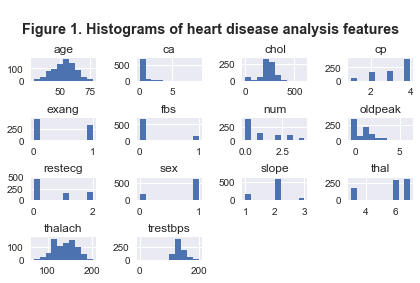

In [4]:
sns.set(font_scale=1.00)
all_three_df.hist()
plt.suptitle('\nFigure 1. Histograms of heart disease analysis features', fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.80)
plt.show()

Figure 1 shows the general structure of data from each variable in the consolidated dataset, with most variables being categorical in nature. For many individuals the target variable, "num", shows the highest number of individuals to have a category of "0", which indicates lack of detected heart disease. However, there are many individuals in this dataset who appear to have detectable heart disease (categories 1-4).

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: T

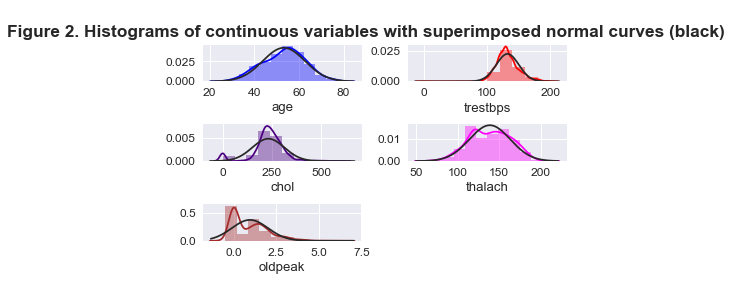

In [5]:
sns.set(font_scale=1.20)
plt.subplot(3,2,1)
plt.suptitle("\nFigure 2. Histograms of continuous variables with superimposed normal curves (black)", fontweight='bold')
sns.distplot(all_three_df['age'], color='blue', hist=True, bins=10, fit=norm)
plt.subplot(3,2,2)
sns.distplot(all_three_df['trestbps'], color='red', hist=True, bins=10, fit=norm)
plt.subplot(3,2,3)
sns.distplot(all_three_df['chol'], color='indigo', hist=True, bins=10, fit=norm)
plt.subplot(3,2,4)
sns.distplot(all_three_df['thalach'], color='magenta', hist=True, bins=10, fit=norm)
plt.subplot(3,2,5)
sns.distplot(all_three_df['oldpeak'], color='brown', hist=True, bins=10, fit=norm)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

In Figure 2 continuous variables from this dataset are shown with normal curves overlain in black to enable visual comparison of data from each variable versus expectations if data are normally distributed. The variables age, "trestbps", and "thalach" show good agreement with normal curves, while "chol" and "oldpeak" diverge a bit more, though chol shows a mean close to that expected with a normal distribution.

Figures 3-8 show relationships between continuous variables, examined as simple linear regressions but divided by sex.

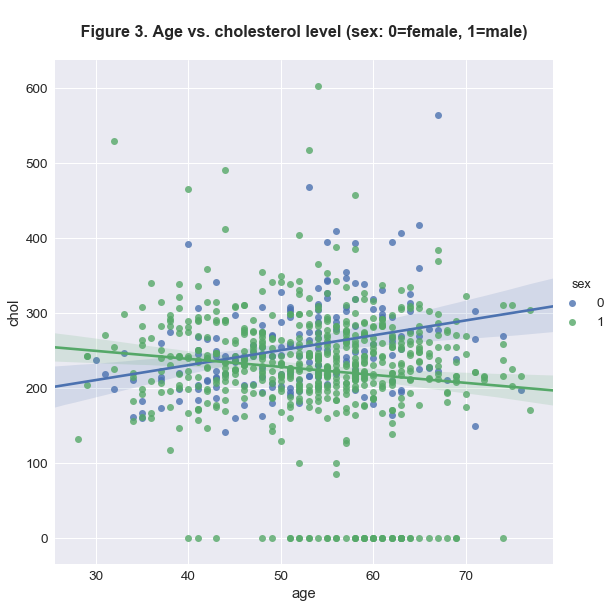

In [6]:
sns.set(font_scale=1.35)
sns.lmplot(x='age', y='chol', data=all_three_df, hue='sex',size=8)
plt.title('\n Figure 3. Age vs. cholesterol level (sex: 0=female, 1=male) \n', fontweight='bold')
plt.show()

In Figure 3, it is hard to distinguish an obvious relationship between age and cholesterol, though by sex it appears from the data available here that for women there is a trend between increasing age and cholesterol level. For men, the trend appears in the opposite direction using these data. 

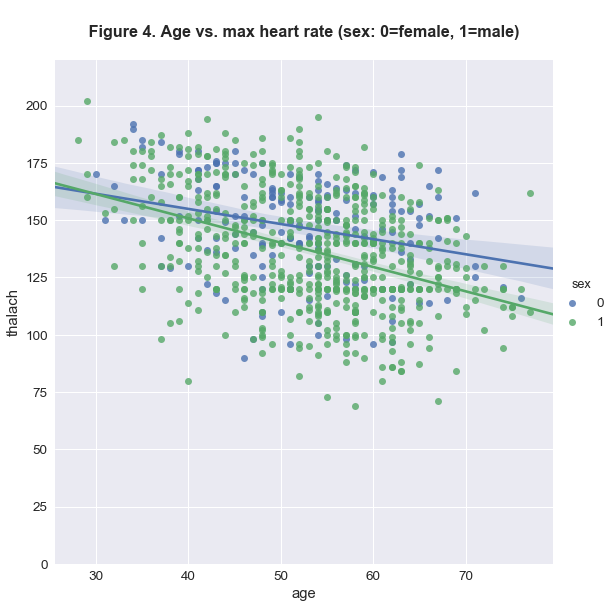

In [7]:
sns.set(font_scale=1.35)
axy = sns.lmplot(x='age', y='thalach', data=all_three_df, hue='sex', size=8)
plt.title('\n Figure 4. Age vs. max heart rate (sex: 0=female, 1=male) \n', fontweight='bold')
axy.set(ylim=(0, 220))
plt.show()

In Figure 4, from these data there appears to be a slight downward trend in maximum heart rate ("thalach") with age. This is apparent for both sexes, possibly more for men.

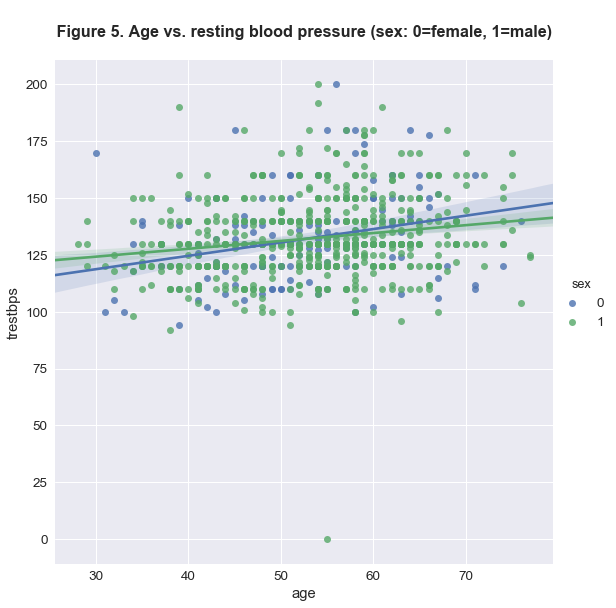

In [8]:
sns.set(font_scale=1.35)
sns.lmplot(x='age', y='trestbps', data=all_three_df, hue='sex', size=8)
plt.title('\n Figure 5. Age vs. resting blood pressure (sex: 0=female, 1=male) \n', fontweight='bold')
plt.show()

In Figure 5, from these data it appears that resting blood pressure ("trestbps") tends to increase with age for both sexes.

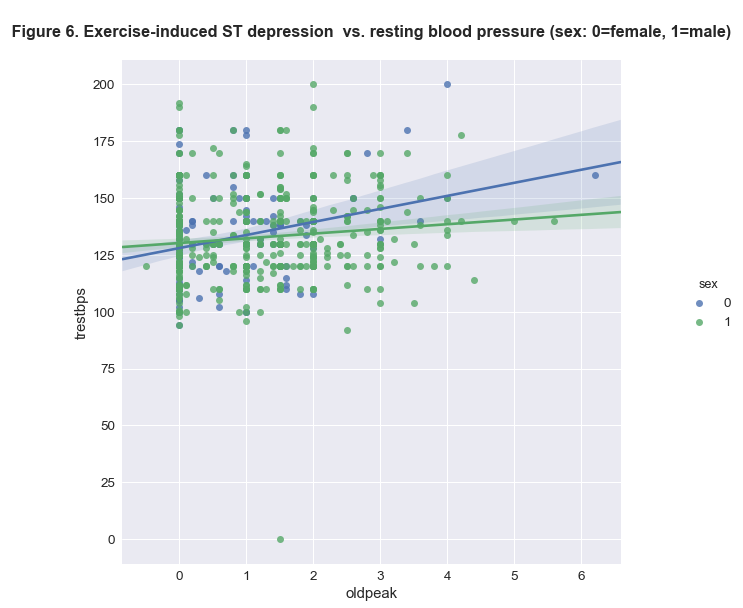

In [9]:
sns.set(font_scale=1.35)
sns.lmplot(x='oldpeak', y='trestbps', data=all_three_df, hue='sex', size=8)
plt.title('\n Figure 6. Exercise-induced ST depression  vs. resting blood pressure (sex: 0=female, 1=male) \n', 
          fontweight='bold')
plt.show()

In Figure 6, it is difficult to discern a clear relationship between exercise-induced ST depression ("oldpeak") and resting blood pressure ("trestbps"). There is possibly a weak, positive trend, but this is difficult to assess from this plot with very large bands around trendlines.

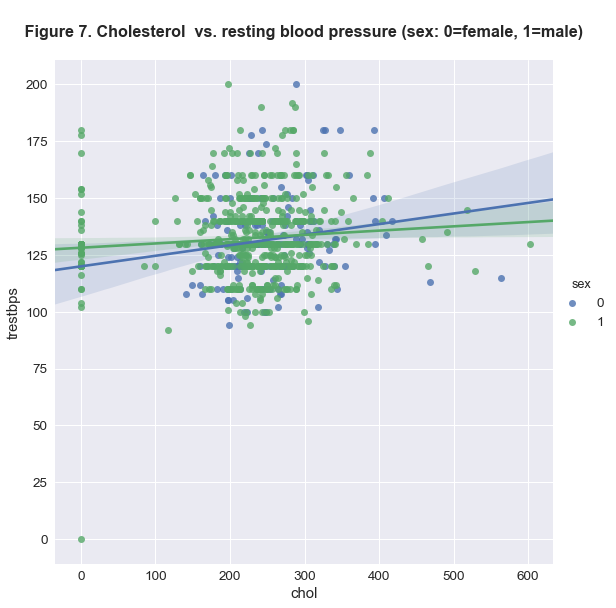

In [10]:
sns.set(font_scale=1.35)
sns.lmplot(x='chol', y='trestbps', data=all_three_df, hue='sex', size=8)
plt.title('\n Figure 7. Cholesterol  vs. resting blood pressure (sex: 0=female, 1=male) \n', fontweight='bold')
plt.show()

In Figure 7, with these data it appears that the relationship between cholesterol level ("chol") and resting heart rate ("trestbps") may be weak. This figure suggests a slightly stronger trend for women than for men for this relationship, though the confidence interval for women is quite broad.

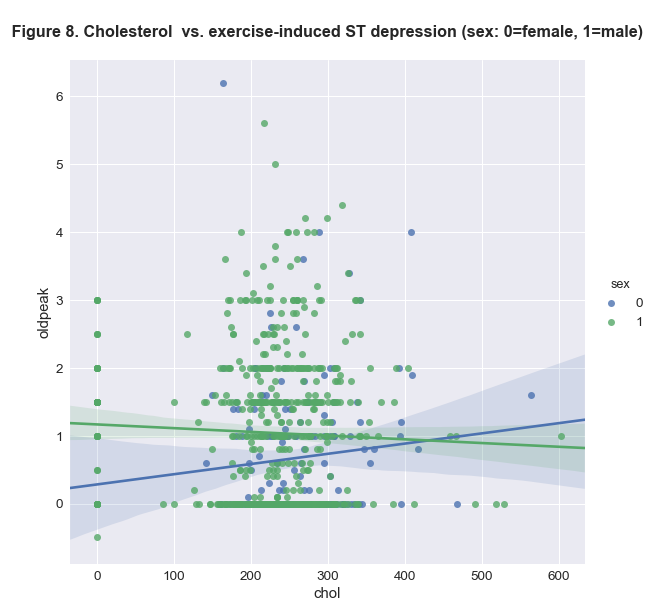

In [11]:
sns.set(font_scale=1.35)
sns.lmplot(x='chol', y='oldpeak', data=all_three_df, hue='sex', size=8)
plt.title('\n Figure 8. Cholesterol  vs. exercise-induced ST depression (sex: 0=female, 1=male) \n', fontweight='bold')
plt.show()

In Figure 8, with these data it is difficult to discern a clear pattern for exercise-induced ST depression ("oldpeak") and cholesterol level ("chol").

Overall, most of the data available in this dataset do not show striking patterns between variables paired against each other one-on-one. Also, many variables are categorical, which are harder to plot and view patterns with, so they are excluded here. Among the continuous variables, though, there may be some patterns that show predictive value. More sophisticated analyses of variables such as cholesterol and sex may show stronger correlations with level of heart disease than what is viewable in the simpler exploratory analyses shown here. Some categorical variables in this study are derived from metrics that are continuous in nature, but are here allocated into bins based on where the numbers fall in ranges. 

It is hard to make much of these data at this point, but even though there is much noise in the data viewed here, the trendlines show potential for some relationships.



*Exploratory data analysis approach*

There is a total of 14 numerical variables, including the target variable, included in this dataset. Some are continuous variables, including age, "trestbps", "chol", "thalach", and "oldpeak". The rest are categorical variables, including sex (two categories as 0 and 1), "cp" (four categories as 1, 2, 3, and 4), "fbs" (two categories as 0 and 1), "restecg" (three categories as 0, 1, and 2), "exang" (two categories as 0 and 1), "slope" (three categories as 1, 2, and 3), "ca" (four categories as 0, 1, 2, and 3), "thal" (three categories as 3, 6, and 7), and the target variable "num" (five categories as 0, 1, 2, 3, and 4). Location is a separate variable to consider in the consolidated dataset, as the location associated with each subset is added in a new column in the consolidated set.

The continuous and categorical variables are explored here differently. Primarily, continuous variables are compared with each other using tests of Pearson's correlation coefficients, and categorical variables are primarily compared to each other using chi-square tests of independence.

A goal of inferential analyses in this study is to determine levels of correlation between variables and to judge the statistical significance of any of these relationships. The null hypothesis for each test is that there is no correlation between variables, with an alternate hypothesis for each being that there is a correlation. Figure 9 and Tables 3 and 4 will explore these relationships.


Figure 9. Heatmap of correlations between variables


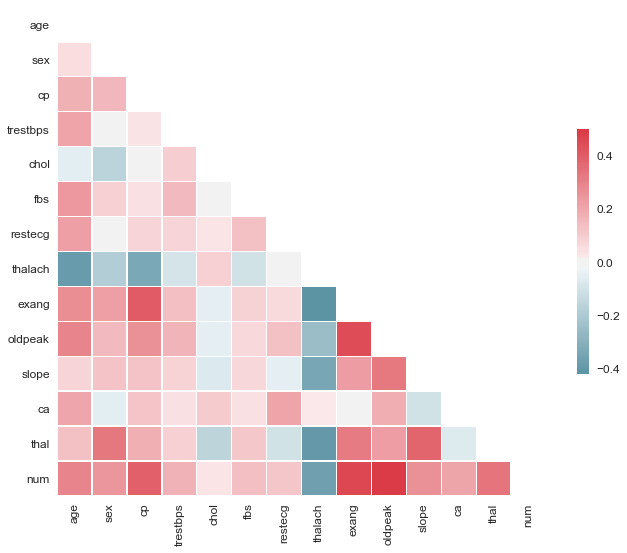

In [12]:
sns.set(style="white", font_scale=1.20)
corr = all_three_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
# mask upper triangle by replacing values with 0 and masking zeros
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
print('\033[1m' + "\nFigure 9. Heatmap of correlations between variables")
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Figure 9 shows the strengths of relationships between variables paired against one another with darker red cells  representing stronger, positive relationships. Darker blue cells represent stronger, negative relationships. The palest cells show the weakest relationships. The feature that shows the greatest amount of dark blue cells is "thalach" (maximum heart rate). This should be unsurprising, as higher values for many variables in this study are suggestive of less optimal health, and maximum heart rate is a measure of cardiac strength.

For relationships with the target variable, "num" or heart disease score, the strongest positive relationships appear to be with "oldpeak" (defined [here](http://archive.ics.uci.edu/ml/datasets/Heart+Disease) as "ST depression induced by exercise and relative to rest") and "exang" (exercise-induced angina). Both of these are features that are either a sign or a symptom of possible cardiovascular distress, though it is not obvious why other features directly related to cardiac health in this dataset show less of a relationship to heart disease score. However, both are defined as exercise-related features, and perhaps that is a condition in which cardiovascular stress is especially prominent. "Oldpeak" and "exang" in this heatmap also show a relatively strong relationship to each other.

Cholesterol level is a variable that does not show strong relationships with other features in this study. Its strongest relationship, from the data available here, seems to be with sex, and it is a negative relationship. For sex this means that it is relatively higher with women than with men. Figues 3, 7, and 8 (above) indicate that cholesterol trends slightly higher for women than for men, especially with age. However, versus the target variable, here cholesterol seems to show the weakest relationship. 

"Fbs" (fasting blood sugar) is another variable that shows relatively weak relationships with other variables in this study. Its strongest relationship is a possibly weak relationship with age. This is not surprising as insulin resistance may be more likely with age, though it does not seem to show a strong pattern with variables here that are directly tied to cardiac health. 

Some features in Figure 9 appear to show no relationships. It is possible, though, that interactions between variables may be important, such as the example in which there seems to be very little relationship between cholesterol and age, but when data are split by sex, as in Figure 3, opposite patterns appear. This heatmap is based on a correlation matrix, which is calculated most accurately for continuous variables, though many categorical variables in this study are bins for continuous data, so a heatmap may be used for a rough approximation of the strengths of relationships between variables. For calculated values, Table 3 shows Pearson correlation coefficients and significance values for relationships between continuous variables, and Table 4 shows chi-square statistics and significance values derived from chi-square tests of independence between categorical variables. For each of these tables, relationships with p-values that are set to < 0.001 are shown in bold.

In [13]:
def pearson_general(colA, colB, alpha=0.001):
    A = all_three_df[colA].astype(float)
    B = all_three_df[colB].astype(float) 
    
    r, p = pearsonr(B,A)
    if p<alpha:
        result="\033[1m {} with {}:".format(colA,colB)
    else:
        result="\033[0m {} with {}:".format(colA,colB)
    print(result, f"Pearson r = {round(r,3)}, p = {round(p,5)}")

print('\033[4m\033[1m\nTable 3. Pearson correlation coefficients (r) and p-values (p) for relationships between continuous variables:\n\033[0m')
cols = ['age','trestbps', 'chol', 'thalach', 'oldpeak']
for e,f in itertools.combinations(cols,2):
    pearson_general(e,f)


Table 3. Pearson correlation coefficients (r) and p-values (p) for relationships between continuous variables:

 age with trestbps: Pearson r = 0.213, p = 0.0
 age with chol: Pearson r = -0.053, p = 0.13291
 age with thalach: Pearson r = -0.382, p = 0.0
 age with oldpeak: Pearson r = 0.296, p = 0.0
 trestbps with chol: Pearson r = 0.1, p = 0.00459
 trestbps with thalach: Pearson r = -0.091, p = 0.01022
 trestbps with oldpeak: Pearson r = 0.164, p = 0.0
 chol with thalach: Pearson r = 0.094, p = 0.00811
 chol with oldpeak: Pearson r = -0.041, p = 0.2423
 thalach with oldpeak: Pearson r = -0.249, p = 0.0


Pearson correlation coefficients in Table 3 show no especially strong relationships between continuous variables, but there appear to be some modest relationships, such as between age and "trestbps" (resting blood pressure), with r=0.213; age with "thalach" (maximum heart rate), with r=-0.382; age with "oldpeak" (exercise-induced ST depression), with r=0.296; "thalach" with "oldpeak", with r=-0.249; and a weaker relationship between "trestbps" and "oldpeak" of r=0.164. Each of these correlations appears strongly statistically significant, with p-values below 0.001 for these. 

Other statistically significant (p < 0.05) correlations appear for "trestbps" with "chol" (cholesterol), "trestbps" with "thalach", and "chol" with "thalach", but these are all with Pearson's r values of a magnitude at or < 0.1. 

Two comparisons here have very weak relationships that lack statistical significance, being age with cholesterol (r=-0.053, p=0.133) and cholesterol with "oldpeak" (r=-0.041, p=0.2423). The null hypothesis of no relationship for these pairs cannot be rejected. 

In [14]:
def Chi2test_general(colV, colZ, alpha=0.001):
    V = all_three_df[colV].astype(str)
    Z = all_three_df[colZ].astype(str)        
    obs = pd.crosstab(Z,V) 
    chi2, p, dof, expected = stats.chi2_contingency(obs.values)        
    Expected = pd.DataFrame(expected, columns=obs.columns, index = obs.index)
    if p<alpha:
        result="\033[1m {} with {}:".format(colV,colZ)
    else:
        result="\033[0m {} with {}:".format(colV,colZ)
    print(result, f"Chi-square stat. = {round(chi2,2)}, p = {round(p,5)}")
    
print('\033[4m\033[1m\nTable 4. Chi-square statistics and p-values (p) for relationships between categorical variables:\n\033[0m')  
Columns = ['location','sex','cp','fbs','restecg','exang','slope','ca','thal','num']
for g,h in itertools.combinations(Columns,2):
    Chi2test_general(g,h) 


Table 4. Chi-square statistics and p-values (p) for relationships between categorical variables:

 location with sex: Chi-square stat. = 62.34, p = 0.0
 location with cp: Chi-square stat. = 77.76, p = 0.0
 location with fbs: Chi-square stat. = 64.51, p = 0.0
 location with restecg: Chi-square stat. = 325.05, p = 0.0
 location with exang: Chi-square stat. = 111.37, p = 0.0
 location with slope: Chi-square stat. = 239.14, p = 0.0
 location with ca: Chi-square stat. = 238.53, p = 0.0
 location with thal: Chi-square stat. = 867.0, p = 0.0
 location with num: Chi-square stat. = 77.33, p = 0.0
 sex with cp: Chi-square stat. = 30.72, p = 0.0
 sex with fbs: Chi-square stat. = 6.38, p = 0.01153
 sex with restecg: Chi-square stat. = 3.63, p = 0.16249
 sex with exang: Chi-square stat. = 37.7, p = 0.0
 sex with slope: Chi-square stat. = 12.9, p = 0.00158
 sex with ca: Chi-square stat. = 6.25, p = 0.18145
 sex with thal: Chi-square stat. = 96.04, p = 0.0
 sex with num: Chi-square stat. = 74.11, p 

In Table 4 it appears that the variables location, "restecg" (resting electrocardiographic results) and perhaps "slope" (defined [here](http://archive.ics.uci.edu/ml/datasets/Heart+Disease) as "slope of the peak exercise ST segment") and "thal" (relating to thalassemia) very frequently show high chi-square statistics with other variables - relationships that are highly statistically significant with p < 0.001. 

It is possible that the strong relationships location forms with other variables may be an artifact of data collection, with some locations collecting more data than others, potentially skewing the value-assigned missing data in some cases. 

The variable "fbs" (fasting blood sugar) shows weaker relationships with other variables. It does, however, bear a statistically significant relationship with the target variable "num" and thus may have predictive value. Importantly, here, all categorical variables tested with chi-square analysis show statistically significant relationships with "num", indicating these variables may all have use for prediction. However, many of them may be correlated with each other enough to complicate their individual predictive utility for heart disease.

Most of these factors are variables that directly relate to measurements of cardiovascular function, so this is unsurprising. Fbs, which is fasting blood sugar, and sex are not as directly related to measurements of cardiovascular function, but they may be connected through other relationships to health. Age may prove to be important, though being a continuous variable, it is not paired with categorical variables for analysis at this point. Most variables included in correlation analyses with age, however, do show strongly statistically significant relationships with it (trestbps, thalach, and oldpeak); the exception is cholesterol.
___

## Predictive modeling

Upcoming analyses to be conducted with these data will incorporate machine learning techniques. It is not yet clear which machine learning approach will yield the best predictive model, but this will be ascertained next. Additionally, in order to make the model most useful to potential clients, XGBoost will be used to apply meaning to probabilities provided by machine learning, in terms of which factors for a given entry contribute most to the patient's risk. 

The datasets used in this report are suited to development of a machine learning-based predictive model as each contains information that was collected in a similar fashion. Once a model is developed, and we have a better idea of the relative impact of each factor in influence heart disease risk, it may be appropriate to consider application to other datasets that may contain slightly different sets of information. Such data could come from information provided by the United States government, the World Health Organization, or state-level health data. Geographic information about rates of heart disease is available from these sources as well, and, once a model is derived, these could be probed for information that could either interact with the predictive model or be used in a wider report about heart disease risks and patterns.
___

## Cited references
Batista, D.S. “Hyperparamter optimization across multiple models in scikit-learn.” Web. Accessed: 6/11/18. http://www.davidsbatista.net/blog/2018/02/23/model_optimization/ .

Centers for Disease Control and Prevention. National Environmental Public HealthTracking Network. Web. Accessed: 3/1/18. www.cdc.gov/ephtracking.

Katsaroumpas, P. “Hyperparameter Grid Search across multiple models in scikit-learn.” Web. Accessed: 6/11/18. http://www.codiply.com/blog/hyperparameter-grid-search-across-multiple-models-in-scikit-learn/ . 

Lundberg, S.M., & Lee, S.I. 2017. A unified approach to interpreting model predictions. 31st Conference on Neural Information Processing Systems (NIPS 2017), Long Beach, CA, USA. Pages 1-10.

Lundberg, S.M., Erion, G.G., & Lee, S.I. 2018. Consistent individualized feature attribution for tree ensembles. eprint arXiv:1802.03888. Pages 1-9. 

University of California, Irvine, Machine Learning Repository. Heart Disease Data Set. Web. Accessed: 3/11/18. archive.ics.uci.edu/ml/datasets/Heart+Disease. Principal investigator information for component datasets used in this study: Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.; V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

___

## Machine learning model development

Before training the dataset with machine learning classifiers, data may require more processing. Early on we already imputed missing data using medians or modes for features as appropriate from subpopulation sample estimates, but we have to address the fact that the "location" column contains non-numeric, categorical information that will not fit into machine learning algorithms well, so we create dummy variables out of location information with Boolean data type in one of three new columns, representing each location, and replacing the "location" column. We could go further and remove one of these columns (as a 0 in either of the two other columns implies assignment to the third location), but if we are examining feature importance later, we may as well keep each of these columns in, in case one of the locations is found to be important. 

Since one of the populations (Cleveland) included in this dataset provides more complete information than the other two do, model testing will include both the entire dataset and parallel modeling with just the Cleveland component. Another level of testing within the dataset will involve the nature of the target variable, which is present as a multiclass variable with five classes. It may be difficult for even the best algorithm to predict within which level of heart disease severity an individual may possess, so multiclass and binary (absence or presence of heart disease) categorizations will face preliminary testing as well.

Next is the decision of which machine learning model(s) to use. There are many, and some have advantages over others in terms of computational speed and complexity, or in handling different data structures. The dataset used here is small enough (n=797) and with a manageable number of features (n=16 with dummy location variables) so as not to be unwieldy with most algorithms. Data are labeled and ultimately fit into a classification scheme for the target variable: primarily we want to know how likely it is for someone to develop heart disease, and, if possible, with which severity (which can be argued to be either quantitative or fitting into classes). This still leaves a lot of options, so several likely appropriate classifiers will be tested, with some hyperparameter tuning and cross-validation, to help determine the best model(s) with which to move forward. Accuracy, precision, and recall will be examined at this point.

Finally feature importance is examined to determine which of the features of the model contribute the most to predictive power. Individual feature importance is enabled by a prediction tool in XGBoost that shows the contributions of each feature to any individual's target phenotype and visualized using Shap. This is where the power of a predictive model shines.

## Choosing a model 

There are many possible suitable supervised learning algorithms that may help explain patterns within the heart disease dataset and be useful for prediction of heart disease risk based on features. Choice of algorithm relies on how each model handles the data present in the dataset upon which the model is trained and applied to test data. Each model may also fare better or worse in handling either a multiclass or binary target variable. Hyperparameter tuning is a process that enables an algorithm to perform at its best, but it is computationally costly, so for most tests it will be considered after a preliminary analysis of model performance. 

Results of preliminary analyses of model performance are shown in Tables 5 and 6 (full dataset and Cleveland, respectively) with accuracies shown for both training and testing data. If accuracy approaches 100% for training data and is considerably lower for testing data, then it can be presumed that the model is overfitted to the training data.

Visual comparisons of accuracy on testing data are shown in Figures 10 and 11 (full dataset and Cleveland, respectively). In Figures 10 and 11 it can also be readily seen how well each model performs for the multiclass target variable ("full") versus a binary target analysis. 

In these figures and Tables 5 and 6 model classifier names are abbreviated, but abbreviations mean the following: "RF" represents random forest, "tuned RF" represents a random forest test with hyperparameter tuning using GridSearchCV, "MNB" represents multinomial naive bayes, "GNB" represents Gaussian naive bayes, "LogReg" represents logistic regression, "SVM" represents support vector machine, "LSVM" represents linear support vector machine, "DT" represents decision tree, "GB" represents gradient boosting classifier, "SGD" represents SGD classifier, "ET" represents extra trees classifier, "XGB" represents XGBoost, and "NN" represents a neural network classifier.

In both Tables 5 and 6, what is apparent is that for most models accuracy on training data is considerably higher than for test data. The pattern also emerges that when classifying as a multiclass target variable, test accuracy tends to be much lower than when the target variable is treated as a binary variable. The tuned random forest tests show much lower accuracy on training data than non-tuned tests do, so they are less likely overfitted to training data, though test accuracy does not go up with this ensemble classifier. However, for later modeling, hyperparameter tuning will be employed to some degree (with consideration of computational constraints).

In both Figures 10 and 11, it is easier to spot the profound differences in both accuracy with regard to the classification of the target variable as well as differences between models in their accuracy with these data. Accuracy here is based on scores for test samples rather than training data. Most classifiers perform fairly well with a binary target variable here, though linear SVM, SGD, and ET do poorly here even with the binary target. For linear SVM, however, there is a difference in performance between the full dataset and the Cleveland subset in these tests, with linear SVM performing better than all others for the binary target in this subset. 

Most models tested as shown in Figures 10 and 11 performed at least slightly better with the Cleveland subset of data than with the full dataset that included relatively more imputed data. This is unsurprising since the Cleveland subset could be said to contain relatively more accurate information. Overall, examining the binary target of presence or absence of heart disease and using random forest, logistic regression, or a boosting algorithm seem to be supported as the most effective approaches with the heart disease data. Next is an examination of accuracy with these algorithm types with slight hyperparameter tuning and on the binary target.

Tables 7 and 8 feature more extensive comparisons of algorithms for modeling with the binary target, ranked by mean scores, and including some parameter tuning for each. Code for this follows upon code presented [here](http://www.codiply.com/blog/hyperparameter-grid-search-across-multiple-models-in-scikit-learn/) and altered for Python 3 using code presented [here](http://www.davidsbatista.net/blog/2018/02/23/model_optimization/), with further modifications introduced in this report in order to add XGBoost and logistic regression tests, to add more parameters to test, and to clarify that it is restricted to training data. Table 7 is a ranking for the entire dataset, and Table 8 is for Cleveland-only data. 

Tables 7 and 8 contain a lot of detail, but the bottom line is that for the full dataset logistic regression, XGBoost, and random forest models perform the best, at least on the training data, regardless of hyperparameters. The exception is that linear SVC starts to perform relatively well, too, when the logistic regression "C" values are higher, and - in the case of this particular run of the test - with a mid-range random forest number of estimators, and with the XGBoost max_depth raised from the default value of 3. The top 10 highest-ranking tests, though, come from logistic regression, XGBoost, and random forest models. This ranking is allocated by mean scores, too, so when maximum scores are considered XGBoost ranks higher.

Interestingly, with just the Cleveland subset (Table 8) considered in this analysis of hyperparameter optimization, the extra trees classifier performs best on these training data with the number of estimators raised. The extra trees classifier performs much less well with the full dataset (Table 7), regardless of hyperparameter tuning.

XGBoost generally performs well with the full dataset and is amenable to further explorations of feature importance at the individual level, so this model will be explored further. 



In [3]:
#Turn location into dummy variables
all_three_df_location = pd.get_dummies(all_three_df)
print(all_three_df_location.head())

#all_three_df_location = all_three_df_location.drop(location_Hungary, axis=1)
#print(all_three_df_location.head())

    age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0    1   1     145.0  233.0    1        2    150.0      0      2.3   
1  67.0    1   4     160.0  286.0    0        2    108.0      1      1.5   
2  67.0    1   4     120.0  229.0    0        2    129.0      1      2.6   
3  37.0    1   3     130.0  250.0    0        0    187.0      0      3.5   
4  41.0    0   2     130.0  204.0    0        2    172.0      0      1.4   

   slope  ca  thal  num  location_Cleveland  location_Hungary  \
0      3   0     6    0                   1                 0   
1      2   3     3    2                   1                 0   
2      2   2     7    1                   1                 0   
3      3   0     3    0                   1                 0   
4      1   0     3    0                   1                 0   

   location_Long_Beach  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  


In [4]:
from imblearn.over_sampling import SMOTE

X = all_three_df_location.drop('num', axis = 1)
y = all_three_df_location.num
y0 = (all_three_df_location.num == 0).values
y1 = (all_three_df_location.num >= 1).values

smote = SMOTE(kind='regular')
X_sm, y_sm = smote.fit_sample(X, y)

smote0 = SMOTE(kind='regular')
X0_sm, y0_sm = smote.fit_sample(X, y0)

smote1 = SMOTE(kind='regular')
X1_sm, y1_sm = smote.fit_sample(X, y1)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

X = all_three_df_location.drop('num', axis = 1)
# Split the data into a training and test set.
#Xlr, Xtestlr, ylr, ytestlr = train_test_split(dflog[['Height','Weight']].values, (dflog.Gender == "Male").values,random_state=5)

#clf = LogisticRegression()
# Fit the model on the trainng data.
#clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
#print(accuracy_score(clf.predict(Xtestlr), ytestlr))

CX_train, CX_test, cy_train, cy_test = train_test_split(X_sm, y_sm, random_state=29)
rfcc = RandomForestClassifier()
rfcc.fit(CX_train, cy_train)
print('Basic Random Forest accuracy on training data:',round(rfcc.score(CX_train, cy_train),3))
print('Basic Random Forest accuracy on test data:',round(rfcc.score(CX_test, cy_test),3))

rfcc_pred = rfcc.predict(CX_test)
print(classification_report(cy_test,rfcc_pred))

Basic Random Forest accuracy on training data: 0.991
Basic Random Forest accuracy on test data: 0.746
             precision    recall  f1-score   support

          0       0.67      0.90      0.77        78
          1       0.70      0.61      0.65       119
          2       0.77      0.67      0.72       108
          3       0.74      0.68      0.71        99
          4       0.85      0.94      0.89       100

avg / total       0.75      0.75      0.74       504



In [62]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators' : [1,3,9,18,36,96,200,600], 'max_depth': [1,3,9], 'min_samples_leaf': [1,3,10]}
CV_rfcc = GridSearchCV(estimator=rfcc, param_grid=param_grid, cv=5)
CV_rfcc.fit(CX_train, cy_train)
print(CV_rfcc.best_params_)
print(CV_rfcc.best_score_)
print(CV_rfcc.best_estimator_)

{'max_depth': 9, 'min_samples_leaf': 1, 'n_estimators': 200}
0.7399073461283918
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [63]:
from sklearn.metrics import classification_report, confusion_matrix
#using parameters found by Grid Search plus feature selection by square root
#rfcc_tuned = RandomForestClassifier(CV_rfcc.best_estimator_)
rfcc_tuned = CV_rfcc.best_estimator_
rfcc_tuned.fit(CX_train, cy_train)
cy_true, cy_predict = cy_test, rfcc_tuned.predict(CX_test)
print('Tuned random forest accuracy on training data:',round(rfcc_tuned.score(CX_train, cy_train),3))
print('Tuned random forest accuracy on test data:',round(rfcc_tuned.score(CX_test, cy_test),3))
print('\nClassification report:\n',classification_report(cy_true,cy_predict))
print('Confusion matrix:\n',confusion_matrix(cy_true,cy_predict))


Tuned random forest accuracy on training data: 0.952
Tuned random forest accuracy on test data: 0.752

Classification report:
              precision    recall  f1-score   support

          0       0.73      0.88      0.80        78
          1       0.71      0.62      0.66       119
          2       0.79      0.77      0.78       108
          3       0.81      0.57      0.67        99
          4       0.73      0.97      0.84       100

avg / total       0.76      0.75      0.74       504

Confusion matrix:
 [[69  6  1  1  1]
 [18 74 10  8  9]
 [ 3  7 83  3 12]
 [ 4 17  9 56 13]
 [ 0  0  2  1 97]]


In [64]:
CX_train, CX_test, cy_train0, cy_test0 = train_test_split(X, (all_three_df_location.num == 0).values, random_state=29)
rfcc0 = RandomForestClassifier()
rfcc0.fit(CX_train, cy_train0)
print('Basic Random Forest accuracy on training data:',round(rfcc0.score(CX_train, cy_train0),3))
print('Basic Random Forest accuracy on test data:',round(rfcc0.score(CX_test, cy_test0),3))

rfcc0_pred = rfcc0.predict(CX_test)
print(classification_report(cy_test0,rfcc0_pred))
param_grid = {'n_estimators' : [1,3,9,18,36,96,200,600], 'max_depth': [1,3,9], 'min_samples_leaf': [1,3,10]}
CV_rfcc0 = GridSearchCV(estimator=rfcc0, param_grid=param_grid, cv=5)
CV_rfcc0.fit(CX_train, cy_train0)
print(CV_rfcc0.best_params_)
print(CV_rfcc0.best_score_)
print(CV_rfcc0.best_estimator_)

Basic Random Forest accuracy on training data: 0.992
Basic Random Forest accuracy on test data: 0.755
             precision    recall  f1-score   support

      False       0.72      0.83      0.77        98
       True       0.80      0.69      0.74       102

avg / total       0.76      0.76      0.75       200

{'max_depth': 3, 'min_samples_leaf': 10, 'n_estimators': 36}
0.8190954773869347
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=36, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [65]:
rfcc0_tuned = CV_rfcc0.best_estimator_
rfcc0_tuned.fit(CX_train, cy_train0)
cy_true0, cy_predict0 = cy_test0, rfcc0_tuned.predict(CX_test)
print('Tuned random forest accuracy on training data:',round(rfcc0_tuned.score(CX_train, cy_train0),3))
print('Tuned random forest accuracy on test data:',round(rfcc0_tuned.score(CX_test, cy_test0),3))
print('\nClassification report:\n',classification_report(cy_true0,cy_predict0))
print('Confusion matrix:\n',confusion_matrix(cy_true0,cy_predict0))

Tuned random forest accuracy on training data: 0.832
Tuned random forest accuracy on test data: 0.785

Classification report:
              precision    recall  f1-score   support

      False       0.76      0.83      0.79        98
       True       0.82      0.75      0.78       102

avg / total       0.79      0.79      0.78       200

Confusion matrix:
 [[81 17]
 [26 76]]


In [33]:
from sklearn.naive_bayes import MultinomialNB
X_sm_mlp = X_sm > 0
CX1_train, CX1_test, cy1_train, cy1_test = train_test_split(X_sm_mlp, y_sm, random_state=29)
mnbc = MultinomialNB()
mnbc.fit(CX1_train, cy1_train)
print('Accuracy on training data:',round(mnbc.score(CX1_train, cy1_train),3))
print('Accuracy on test data:',round(mnbc.score(CX1_test, cy1_test),3))

mnbc_pred = mnbc.predict(CX1_test)
print(classification_report(cy1_test,mnbc_pred))

Accuracy on training data: 0.416
Accuracy on test data: 0.377
             precision    recall  f1-score   support

          0       0.49      0.74      0.59        78
          1       0.34      0.28      0.31       119
          2       0.34      0.19      0.24       108
          3       0.25      0.25      0.25        99
          4       0.42      0.54      0.47       100

avg / total       0.36      0.38      0.36       504



In [35]:
'''
param_grid = {'n_estimators' : [1,3,9,18,36,96,200,600], 'max_depth': [1,3,9], 'min_samples_leaf': [1,3,10]}
CV_rfcc = GridSearchCV(estimator=rfcc, param_grid=param_grid, cv=5)
CV_rfcc.fit(CX_train, cy_train)
print(CV_rfcc.best_params_)
print(CV_rfcc.best_score_)
print(CV_rfcc.best_estimator_)
'''

"\nparam_grid = {'n_estimators' : [1,3,9,18,36,96,200,600], 'max_depth': [1,3,9], 'min_samples_leaf': [1,3,10]}\nCV_rfcc = GridSearchCV(estimator=rfcc, param_grid=param_grid, cv=5)\nCV_rfcc.fit(CX_train, cy_train)\nprint(CV_rfcc.best_params_)\nprint(CV_rfcc.best_score_)\nprint(CV_rfcc.best_estimator_)\n"

In [36]:
'''
rfcc0_tuned = CV_rfcc0.best_estimator_
rfcc0_tuned.fit(CX_train, cy_train0)
cy_true0, cy_predict0 = cy_test0, rfcc0_tuned.predict(CX_test)
print('Tuned random forest accuracy on training data:',round(rfcc0_tuned.score(CX_train, cy_train0),3))
print('Tuned random forest accuracy on test data:',round(rfcc0_tuned.score(CX_test, cy_test0),3))
print('\nClassification report:\n',classification_report(cy_true0,cy_predict0))
print('Confusion matrix:\n',confusion_matrix(cy_true0,cy_predict0))
'''

"\nrfcc0_tuned = CV_rfcc0.best_estimator_\nrfcc0_tuned.fit(CX_train, cy_train0)\ncy_true0, cy_predict0 = cy_test0, rfcc0_tuned.predict(CX_test)\nprint('Tuned random forest accuracy on training data:',round(rfcc0_tuned.score(CX_train, cy_train0),3))\nprint('Tuned random forest accuracy on test data:',round(rfcc0_tuned.score(CX_test, cy_test0),3))\nprint('\nClassification report:\n',classification_report(cy_true0,cy_predict0))\nprint('Confusion matrix:\n',confusion_matrix(cy_true0,cy_predict0))\n"

In [37]:
from sklearn.naive_bayes import GaussianNB
CX2_train, CX2_test, cy2_train, cy2_test = train_test_split(X_sm, y_sm, random_state=29)
gnbc = GaussianNB()
gnbc.fit(CX2_train, cy2_train)
print('Accuracy on training data:',round(gnbc.score(CX2_train, cy2_train),3))
print('Accuracy on test data:',round(gnbc.score(CX2_test, cy2_test),3))

gnbc_pred = gnbc.predict(CX2_test)
print(classification_report(cy2_test,gnbc_pred))

Accuracy on training data: 0.49
Accuracy on test data: 0.423
             precision    recall  f1-score   support

          0       0.53      0.78      0.63        78
          1       0.28      0.15      0.20       119
          2       0.34      0.31      0.32       108
          3       0.30      0.22      0.26        99
          4       0.51      0.79      0.62       100

avg / total       0.38      0.42      0.39       504



## Table 7. Ranking of tuned models on full dataset (binary classification)

In [38]:
from sklearn.model_selection import GridSearchCV


#y = all_three_df_location.num
y = (all_three_df_location.num == 0).values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=29)

class EstimatorSelectionHelper:
    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}
    
    def fit(self, X_train, y_train, cv=3, n_jobs=1, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs, 
                              verbose=verbose, scoring=scoring, refit=refit)
            gs.fit(X_train,y_train)
            self.grid_searches[key] = gs    
    
    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})
                      
        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]
                scores.append(r.reshape(len(params),1))
            all_scores = np.hstack(scores)
            for p,s in zip(params,all_scores):
                rows.append((row(k,s,p)))
        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)
        
        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]
        
        return df[columns]

In [39]:
from sklearn.ensemble import (ExtraTreesClassifier, RandomForestClassifier, 
                              AdaBoostClassifier, GradientBoostingClassifier)
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression

models1 = { 
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'XGBClassifier': XGBClassifier(),
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression()
}

params1 = { 
    'ExtraTreesClassifier': { 'n_estimators': [16, 32, 100] },
    'RandomForestClassifier': { 'n_estimators': [16, 32, 100] },
    'AdaBoostClassifier':  { 'n_estimators': [16, 32, 100] },
    'GradientBoostingClassifier': { 'n_estimators': [16, 32, 100], 'learning_rate': [0.8, 1.0] },
    'XGBClassifier': [{ 'n_estimators': [16, 32, 100]}, {'max_depth': [4, 20]}, {'min_child_weight': [1, 10]}, {'gamma': [0.01, 0.1]}],
    'LogisticRegression': {'C': [0.01, 0.1, 1, 10, 100]},
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
    ]
}

helper1 = EstimatorSelectionHelper(models1, params1)
helper1.fit(X_train, y_train, scoring='f1', n_jobs=-1)

helper1.score_summary(sort_by='mean_score')

Running GridSearchCV for ExtraTreesClassifier.
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Running GridSearchCV for RandomForestClassifier.
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.6s finished


Running GridSearchCV for AdaBoostClassifier.
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.5s finished


Running GridSearchCV for GradientBoostingClassifier.
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.4s finished


Running GridSearchCV for XGBClassifier.
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.5s finished
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

Running GridSearchCV for SVC.
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.0s finished


Running GridSearchCV for LogisticRegression.
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   24.7s finished


ExtraTreesClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
XGBClassifier
SVC
LogisticRegression


[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.2s finished
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



,estimator,min_score,mean_score,max_score,std_score,C,gamma,kernel,learning_rate,max_depth,min_child_weight,n_estimators
31,LogisticRegression,0.77,0.819006,0.862944,0.0381131,0.1,NaN,NaN,NaN,NaN,NaN,NaN
32,LogisticRegression,0.78392,0.811953,0.833333,0.0207142,1,NaN,NaN,NaN,NaN,NaN,NaN
24,SVC,0.792079,0.811939,0.84,0.0204049,1,NaN,linear,NaN,NaN,NaN,NaN
34,LogisticRegression,0.772277,0.80938,0.837209,0.0273073,100,NaN,NaN,NaN,NaN,NaN,NaN
25,SVC,0.790244,0.805592,0.826531,0.0153325,10,NaN,linear,NaN,NaN,NaN,NaN
5,RandomForestClassifier,0.768421,0.80223,0.830189,0.0255536,NaN,NaN,NaN,NaN,NaN,NaN,100
33,LogisticRegression,0.772277,0.801915,0.818653,0.0210155,10,NaN,NaN,NaN,NaN,NaN,NaN
18,XGBClassifier,0.793814,0.801038,0.811321,0.00746698,NaN,NaN,NaN,NaN,4,NaN,NaN
21,XGBClassifier,0.782178,0.800261,0.818605,0.0148722,NaN,NaN,NaN,NaN,NaN,10,NaN
4,RandomForestClassifier,0.783505,0.800227,0.821256,0.0157099,NaN,NaN,NaN,NaN,NaN,NaN,32


In [40]:
from sklearn.linear_model import LogisticRegression
CX3_train, CX3_test, cy3_train, cy3_test = train_test_split(X_sm, y_sm, random_state=29)
logregc = LogisticRegression()
logregc.fit(CX3_train, cy3_train)
print('Accuracy on training data:',round(logregc.score(CX3_train, cy3_train),3))
print('Accuracy on test data:',round(logregc.score(CX3_test, cy3_test),3))

logregc_pred = logregc.predict(CX3_test)
print(classification_report(cy3_test,logregc_pred))

Accuracy on training data: 0.494
Accuracy on test data: 0.476
             precision    recall  f1-score   support

          0       0.59      0.81      0.68        78
          1       0.41      0.26      0.32       119
          2       0.43      0.44      0.44       108
          3       0.35      0.28      0.31        99
          4       0.53      0.70      0.61       100

avg / total       0.46      0.48      0.46       504



In [41]:
CX4_train, CX4_test, cy4_train, cy4_test = train_test_split(X, (all_three_df_location.num == 0).values, random_state=29)
rfccno = RandomForestClassifier()
rfccno.fit(CX4_train, cy4_train)
print('Basic Random Forest accuracy on training data:',round(rfccno.score(CX4_train, cy4_train),3))
print('Basic Random Forest accuracy on test data:',round(rfccno.score(CX4_test, cy4_test),3))

rfccno_pred = rfccno.predict(CX4_test)
print(classification_report(cy4_test,rfccno_pred))

Basic Random Forest accuracy on training data: 0.995
Basic Random Forest accuracy on test data: 0.79
             precision    recall  f1-score   support

      False       0.75      0.86      0.80        98
       True       0.84      0.73      0.78       102

avg / total       0.80      0.79      0.79       200



In [42]:
param_grid = {'n_estimators' : [1,3,9,18,36,96,200,600], 'max_depth': [1,3,9], 'min_samples_leaf': [1,3,10]}
CV_rfccno = GridSearchCV(estimator=rfccno, param_grid=param_grid, cv=5)
CV_rfccno.fit(CX4_train, cy4_train)
print(CV_rfccno.best_params_)
print(CV_rfccno.best_score_)
print(CV_rfccno.best_estimator_)

{'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 200}
0.8174204355108877
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [43]:
rfccno_tuned = CV_rfccno.best_estimator_
rfccno_tuned.fit(CX4_train, cy4_train)
cy4_true, cy4_predict = cy4_test, rfccno_tuned.predict(CX4_test)
print('Tuned random forest accuracy on training data:',round(rfccno_tuned.score(CX4_train, cy4_train),3))
print('Tuned random forest accuracy on test data:',round(rfccno_tuned.score(CX4_test, cy4_test),3))
print('\nClassification report:\n',classification_report(cy4_true,cy4_predict))
print('Confusion matrix:\n',confusion_matrix(cy4_true,cy4_predict))


Tuned random forest accuracy on training data: 0.836
Tuned random forest accuracy on test data: 0.785

Classification report:
              precision    recall  f1-score   support

      False       0.75      0.84      0.79        98
       True       0.82      0.74      0.78       102

avg / total       0.79      0.79      0.78       200

Confusion matrix:
 [[82 16]
 [27 75]]


In [69]:
CX5_train, CX5_test, cy5_train, cy5_test = train_test_split(X, (all_three_df_location.num == 0).values, random_state=29)
mnbcno = MultinomialNB()
mnbcno.fit(CX5_train, cy5_train)
print('Accuracy on training data:',round(mnbcno.score(CX5_train, cy5_train),3))
print('Accuracy on test data:',round(mnbcno.score(CX5_test, cy5_test),3))

mnbcno_pred = mnbcno.predict(CX5_test)
print(classification_report(cy5_test,mnbcno_pred))

Accuracy on training data: 0.76
Accuracy on test data: 0.735
             precision    recall  f1-score   support

      False       0.70      0.80      0.75        98
       True       0.78      0.68      0.72       102

avg / total       0.74      0.73      0.73       200



In [44]:
CX6_train, CX6_test, cy6_train, cy6_test = train_test_split(X, (all_three_df_location.num == 0).values, random_state=29)
gnbcno = GaussianNB()
gnbcno.fit(CX6_train, cy6_train)
print('Accuracy on training data:',round(gnbcno.score(CX6_train, cy6_train),3))
print('Accuracy on test data:',round(gnbcno.score(CX6_test, cy6_test),3))

gnbcno_pred = gnbcno.predict(CX6_test)
print(classification_report(cy6_test,gnbcno_pred))

Accuracy on training data: 0.809
Accuracy on test data: 0.8
             precision    recall  f1-score   support

      False       0.77      0.84      0.80        98
       True       0.83      0.76      0.80       102

avg / total       0.80      0.80      0.80       200



In [45]:
CX7_train, CX7_test, cy7_train, cy7_test = train_test_split(X, (all_three_df_location.num == 0).values, random_state=29)
logregcno = LogisticRegression()
logregcno.fit(CX7_train, cy7_train)
print('Accuracy on training data:',round(logregcno.score(CX7_train, cy7_train),3))
print('Accuracy on test data:',round(logregcno.score(CX7_test, cy7_test),3))

logregcno_pred = logregcno.predict(CX7_test)
print(classification_report(cy7_test,logregcno_pred))

Accuracy on training data: 0.819
Accuracy on test data: 0.81
             precision    recall  f1-score   support

      False       0.79      0.84      0.81        98
       True       0.83      0.78      0.81       102

avg / total       0.81      0.81      0.81       200



In [46]:
from sklearn import svm
CX8_train, CX8_test, cy8_train, cy8_test = train_test_split(X_sm, y_sm, random_state=29)
sv = svm.SVC()
sv.fit(CX8_train, cy8_train)
print('Accuracy on training data:',round(sv.score(CX8_train, cy8_train),3))
print('Accuracy on test data:',round(sv.score(CX8_test, cy8_test),3))

sv_pred = sv.predict(CX8_test)
print(classification_report(cy8_test,sv_pred))

Accuracy on training data: 0.997
Accuracy on test data: 0.635
             precision    recall  f1-score   support

          0       0.31      0.97      0.47        78
          1       0.94      0.50      0.65       119
          2       0.89      0.58      0.70       108
          3       0.93      0.55      0.69        99
          4       0.99      0.68      0.80       100

avg / total       0.84      0.63      0.67       504



In [47]:
CX9_train, CX9_test, cy9_train, cy9_test = train_test_split(X_sm, y_sm, random_state=29)
svlin = svm.LinearSVC()
svlin.fit(CX9_train, cy9_train)
print('Accuracy on training data:',round(svlin.score(CX9_train, cy9_train),3))
print('Accuracy on test data:',round(svlin.score(CX9_test, cy9_test),3))

svlin_pred = svlin.predict(CX9_test)
print(classification_report(cy9_test,svlin_pred))

Accuracy on training data: 0.439
Accuracy on test data: 0.403
             precision    recall  f1-score   support

          0       0.31      0.94      0.46        78
          1       0.47      0.26      0.34       119
          2       0.59      0.12      0.20       108
          3       0.47      0.08      0.14        99
          4       0.48      0.78      0.59       100

avg / total       0.47      0.40      0.34       504



In [48]:
CX10_train, CX10_test, cy10_train, cy10_test = train_test_split(X, (all_three_df_location.num == 0).values, random_state=29)
svno = svm.SVC()
svno.fit(CX10_train, cy10_train)
print('Accuracy on training data:',round(svno.score(CX10_train, cy10_train),3))
print('Accuracy on test data:',round(svno.score(CX10_test, cy10_test),3))

svno_pred = svno.predict(CX10_test)
print(classification_report(cy10_test,svno_pred))

Accuracy on training data: 0.995
Accuracy on test data: 0.545
             precision    recall  f1-score   support

      False       0.63      0.17      0.27        98
       True       0.53      0.90      0.67       102

avg / total       0.58      0.55      0.47       200



In [49]:
CX11_train, CX11_test, cy11_train, cy11_test = train_test_split(X, (all_three_df_location.num == 0).values, random_state=29)
svlinno = svm.LinearSVC()
svlinno.fit(CX11_train, cy11_train)
print('Accuracy on training data:',round(svlinno.score(CX11_train, cy11_train),3))
print('Accuracy on test data:',round(svlinno.score(CX11_test, cy11_test),3))

svlinno_pred = svlinno.predict(CX11_test)
print(classification_report(cy11_test,svlinno_pred))

Accuracy on training data: 0.794
Accuracy on test data: 0.77
             precision    recall  f1-score   support

      False       0.71      0.90      0.79        98
       True       0.87      0.65      0.74       102

avg / total       0.79      0.77      0.77       200



In [50]:
from sklearn import tree
CX12_train, CX12_test, cy12_train, cy12_test = train_test_split(X_sm, y_sm, random_state=29)
dt = tree.DecisionTreeClassifier()
dt.fit(CX12_train, cy12_train)
print('Accuracy on training data:',round(dt.score(CX12_train, cy12_train),3))
print('Accuracy on test data:',round(dt.score(CX12_test, cy12_test),3))

dt_pred = dt.predict(CX12_test)
print(classification_report(cy12_test,dt_pred))

Accuracy on training data: 1.0
Accuracy on test data: 0.677
             precision    recall  f1-score   support

          0       0.63      0.74      0.68        78
          1       0.66      0.58      0.62       119
          2       0.65      0.63      0.64       108
          3       0.67      0.59      0.63        99
          4       0.75      0.88      0.81       100

avg / total       0.67      0.68      0.67       504



In [51]:
CX13_train, CX13_test, cy13_train, cy13_test = train_test_split(X, (all_three_df_location.num == 0).values, random_state=29)
dtno = tree.DecisionTreeClassifier()
dtno.fit(CX13_train, cy13_train)
print('Accuracy on training data:',round(dtno.score(CX13_train, cy13_train),3))
print('Accuracy on test data:',round(dtno.score(CX13_test, cy13_test),3))

dtno_pred = dtno.predict(CX13_test)
print(classification_report(cy13_test,dtno_pred))

Accuracy on training data: 1.0
Accuracy on test data: 0.745
             precision    recall  f1-score   support

      False       0.72      0.78      0.75        98
       True       0.77      0.72      0.74       102

avg / total       0.75      0.74      0.74       200



In [52]:
from sklearn.ensemble import GradientBoostingClassifier
CX14_train, CX14_test, cy14_train, cy14_test = train_test_split(X_sm, y_sm, random_state=29)
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=1, learning_rate=1)
gbc.fit(CX14_train, cy14_train)
print('Accuracy on training data:',round(gbc.score(CX14_train, cy14_train),3))
print('Accuracy on test data:',round(gbc.score(CX14_test, cy14_test),3))

gbc_pred = gbc.predict(CX14_test)
print(classification_report(cy14_test,gbc_pred))

Accuracy on training data: 0.768
Accuracy on test data: 0.601
             precision    recall  f1-score   support

          0       0.72      0.86      0.78        78
          1       0.62      0.53      0.57       119
          2       0.52      0.55      0.53       108
          3       0.49      0.44      0.47        99
          4       0.65      0.70      0.68       100

avg / total       0.60      0.60      0.60       504



In [53]:
CX15_train, CX15_test, cy15_train, cy15_test = train_test_split(X, (all_three_df_location.num == 0).values, random_state=29)
gbcno = GradientBoostingClassifier(n_estimators=100, max_depth=1, learning_rate=1)
gbcno.fit(CX15_train, cy15_train)
print('Accuracy on training data:',round(gbcno.score(CX15_train, cy15_train),3))
print('Accuracy on test data:',round(gbcno.score(CX15_test, cy15_test),3))

gbcno_pred = gbcno.predict(CX15_test)
print(classification_report(cy15_test,gbcno_pred))

Accuracy on training data: 0.878
Accuracy on test data: 0.775
             precision    recall  f1-score   support

      False       0.77      0.77      0.77        98
       True       0.78      0.78      0.78       102

avg / total       0.77      0.78      0.77       200



In [54]:
from sklearn.linear_model import SGDClassifier
CX16_train, CX16_test, cy16_train, cy16_test = train_test_split(X_sm, y_sm, random_state=29)
sgd = SGDClassifier(loss="hinge", penalty="l2")
sgd.fit(CX16_train, cy16_train)
print('Accuracy on training data:',round(sgd.score(CX16_train, cy16_train),3))
print('Accuracy on test data:',round(sgd.score(CX16_test, cy16_test),3))

sgd_pred = sgd.predict(CX16_test)
print(classification_report(cy16_test,sgd_pred))

Accuracy on training data: 0.201
Accuracy on test data: 0.24
             precision    recall  f1-score   support

          0       0.67      0.05      0.10        78
          1       0.23      0.98      0.38       119
          2       0.00      0.00      0.00       108
          3       0.00      0.00      0.00        99
          4       0.00      0.00      0.00       100

avg / total       0.16      0.24      0.10       504



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [55]:
CX17_train, CX17_test, cy17_train, cy17_test = train_test_split(X, (all_three_df_location.num == 0).values, random_state=29)
sgdno = SGDClassifier(loss="hinge", penalty="l2")
sgdno.fit(CX17_train, cy17_train)
print('Accuracy on training data:',round(sgdno.score(CX17_train, cy17_train),3))
print('Accuracy on test data:',round(sgdno.score(CX17_test, cy17_test),3))

sgdno_pred = sgdno.predict(CX17_test)
print(classification_report(cy17_test,sgdno_pred))

Accuracy on training data: 0.637
Accuracy on test data: 0.635
             precision    recall  f1-score   support

      False       0.60      0.79      0.68        98
       True       0.70      0.49      0.58       102

avg / total       0.65      0.64      0.63       200



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [9]:

from sklearn.ensemble import ExtraTreesClassifier
CX25_train, CX25_test, cy25_train, cy25_test = train_test_split(X_sm, y_sm, random_state=29)
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(CX25_train, cy25_train)

print('Accuracy on training data:',round(forest.score(CX25_train, cy25_train),3))
print('Accuracy on test data:',round(forest.score(CX25_test, cy25_test),3))
'''
feature_names = X.columns
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
plt.figure(figsize=(12, 8))
plt.title("Feature importances: Extra Trees model on full dataset with multiclass target\n", fontsize=15)
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
feature_names = all_three_df_location.columns
plt.xticks(range(X.shape[1]), feature_names, rotation=45, fontsize=13)
plt.xlim([-1, X.shape[1]])
plt.ylabel('Importance\n', fontsize=13)
plt.xlabel('Feature', fontsize=13)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()
'''

forest_pred = forest.predict(CX25_test)
print(classification_report(cy25_test,forest_pred))


Accuracy on training data: 1.0
Accuracy on test data: 0.825
             precision    recall  f1-score   support

          0       0.79      0.88      0.84        78
          1       0.80      0.68      0.74       119
          2       0.85      0.75      0.80       108
          3       0.81      0.90      0.85        99
          4       0.86      0.96      0.91       100

avg / total       0.83      0.83      0.82       504



In [135]:
param_grid = {'n_estimators' : [1,9,36,96,200], 'max_features': [3,4,16], 'max_depth': [1,3,10], 'min_samples_leaf': [1,3,9]}
forest_cv = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5)
forest_cv.fit(CX25_train, cy25_train)
print(forest_cv.best_params_)
print(forest_cv.best_score_)
print(forest_cv.best_estimator_)

forest_tuned = forest_cv.best_estimator_
forest_tuned.fit(CX25_train, cy25_train)
cy25_true, cy25_predict = cy25_test, forest_tuned.predict(CX25_test)
print('Tuned extra trees accuracy on training data:',round(forest_tuned.score(CX25_train, cy25_train),3))
print('Tuned extra trees accuracy on test data:',round(forest_tuned.score(CX25_test, cy25_test),3))
print('\nClassification report:\n',classification_report(cy25_true,cy25_predict))
print('Confusion matrix:\n',confusion_matrix(cy25_true,cy25_predict))


#Adding various parameters to tune has been resulting in decreasing accuracy, so I'll go with the defaults.


{'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 200}
0.7617471872931834
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=10, max_features=4, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
Tuned extra trees accuracy on training data: 0.946
Tuned extra trees accuracy on test data: 0.784

Classification report:
              precision    recall  f1-score   support

          0       0.80      0.90      0.84        78
          1       0.81      0.63      0.71       119
          2       0.80      0.77      0.78       108
          3       0.78      0.72      0.75        99
          4       0.75      0.96      0.84       100

avg / total       0.79      0.78      0.78       504

Confusion

In [8]:
CX20_train, CX20_test, cy20_train, cy20_test = train_test_split(X, (all_three_df_location.num == 0).values, random_state=29)
foresta = ExtraTreesClassifier(n_estimators=250, random_state=0)
foresta.fit(CX20_train, cy20_train)

print('Accuracy on training data:',round(foresta.score(CX20_train, cy20_train),3))
print('Accuracy on test data:',round(foresta.score(CX20_test, cy20_test),3))

'''
feature_namesa = all_three_df_location.columns
importancesa = foresta.feature_importances_
stda = np.std([tree.feature_importances_ for tree in foresta.estimators_],axis=0)
indicesa = np.argsort(importances)[::-1]
print("Feature ranking:")
for fa in range(X.shape[1]):
    print("%d. feature %d (%f)" % (fa + 1, indicesa[fa], importancesa[indicesa[fa]]))
plt.figure(figsize=(12, 8))
plt.title("Feature importances: Extra Trees model on full dataset with binary target\n", fontsize=15)
plt.bar(range(X.shape[1]), importancesa[indicesa], color="r", yerr=stda[indicesa], align="center")
feature_namesa = all_three_df_location.columns
plt.xticks(range(X.shape[1]), feature_namesa, rotation=45, fontsize=13)
plt.yticks(fontsize=11)
plt.xlim([-1, X.shape[1]])
plt.ylabel('Importance\n', fontsize=13)
plt.xlabel('Feature', fontsize=13)
plt.tight_layout()
plt.show()
'''
foresta_pred = foresta.predict(CX20_test)
print(classification_report(cy20_test,foresta_pred))


Accuracy on training data: 1.0
Accuracy on test data: 0.79
             precision    recall  f1-score   support

      False       0.75      0.86      0.80        98
       True       0.84      0.73      0.78       102

avg / total       0.80      0.79      0.79       200



##  Figure 14. Feature importance using XGBoost on full dataset with a multiclass target

In [ ]:
#This cell keeps stopping the kernel, so I've copied the contents and divided them to rerun down at the bottom.
'''
from xgboost import XGBClassifier, plot_importance
test_size = 0.33
CX18_train, CX18_test, cy18_train, cy18_test = train_test_split(X, all_three_df_location.num, test_size=test_size, random_state=29)
xgb = XGBClassifier()
xgb.fit(CX18_train, cy18_train)
print(xgb)
cy18_pred = xgb.predict(CX18_test)
predictions1 = [round(value) for value in cy18_pred]
#accuracy = accuracy_score(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('Accuracy on training data:',round(xgb.score(CX18_train, cy18_train),3))
print('Accuracy on test data:',round(xgb.score(CX18_test, cy18_test),3))

plot_importance(xgb)
plt.show()
print(classification_report(cy18_test,predictions1))
'''

## Figure 15. Feature importance using XGBoost on full dataset with a binary target

In [ ]:
#Doing the same with this cell as with the previous.
'''
test_size = 0.33
CX19_train, CX19_test, cy19_train, cy19_test = train_test_split(X, (all_three_df_location.num == 0).values, test_size=test_size, random_state=29)
xgbno = XGBClassifier()
xgbno.fit(CX19_train, cy19_train)
print(xgbno)
cy19_pred = xgbno.predict(CX19_test)
predictions2 = [round(value) for value in cy19_pred]
#accuracy = accuracy_score(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('Accuracy on training data:',round(xgbno.score(CX19_train, cy19_train),3))
print('Accuracy on test data:',round(xgbno.score(CX19_test, cy19_test),3))

plot_importance(xgbno)

plt.show()

print(classification_report(cy19_test,predictions2))
'''

In [58]:
from sklearn.neural_network import MLPClassifier  
CX22_train, CX22_test, cy22_train, cy22_test = train_test_split(X_sm, y_sm, random_state=29)
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
mlp.fit(CX22_train, cy22_train) 
predmlp = mlp.predict(CX22_test)
print('Accuracy on training data:',round(mlp.score(CX22_train, cy22_train),3))
print('Accuracy on test data:',round(mlp.score(CX22_test, cy22_test),3))
print(confusion_matrix(cy22_test,predmlp))  
print(classification_report(cy22_test,predmlp))  

Accuracy on training data: 0.368
Accuracy on test data: 0.306
[[47 10  3 10  8]
 [24 39 21 22 13]
 [14 24 14 34 22]
 [ 4 34  6 32 23]
 [ 5 18  3 52 22]]
             precision    recall  f1-score   support

          0       0.50      0.60      0.55        78
          1       0.31      0.33      0.32       119
          2       0.30      0.13      0.18       108
          3       0.21      0.32      0.26        99
          4       0.25      0.22      0.23       100

avg / total       0.31      0.31      0.30       504



In [59]:
CX23_train, CX23_test, cy23_train, cy23_test = train_test_split(X, (all_three_df_location.num == 0).values, random_state=29)
mlpno = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
mlpno.fit(CX23_train, cy23_train) 
predmlpno = mlpno.predict(CX23_test)
print('Accuracy on training data:',round(mlpno.score(CX23_train, cy23_train),3))
print('Accuracy on test data:',round(mlpno.score(CX23_test, cy23_test),3))
print(confusion_matrix(cy23_test,predmlpno))  
print(classification_report(cy23_test,predmlpno))  

Accuracy on training data: 0.742
Accuracy on test data: 0.675
[[68 30]
 [35 67]]
             precision    recall  f1-score   support

      False       0.66      0.69      0.68        98
       True       0.69      0.66      0.67       102

avg / total       0.68      0.68      0.67       200



In [70]:
print('Basic Random Forest accuracy on training data:',round(rfcc.score(CX_train, cy_train),3))
print('Basic Random Forest accuracy on test data:',round(rfcc.score(CX_test, cy_test),3))
rfcc_pred = rfcc.predict(CX_test)
print(classification_report(cy_test,rfcc_pred))

print('Tuned random forest accuracy on training data:',round(rfcc_tuned.score(CX_train, cy_train),3))
print('Tuned random forest accuracy on test data:',round(rfcc_tuned.score(CX_test, cy_test),3))
print('\nClassification report:\n',classification_report(cy_true,cy_predict))
print('Confusion matrix:\n',confusion_matrix(cy_true,cy_predict))

print('MultinomialNB accuracy on training data:',round(mnbc.score(CX1_train, cy1_train),3))
print('MultinomialNB accuracy on test data:',round(mnbc.score(CX1_test, cy1_test),3))
mnbc_pred = mnbc.predict(CX1_test)
print(classification_report(cy1_test,mnbc_pred))

print('GaussianNB accuracy on training data:',round(gnbc.score(CX2_train, cy2_train),3))
print('GaussianNB accuracy on test data:',round(gnbc.score(CX2_test, cy2_test),3))
gnbc_pred = gnbc.predict(CX2_test)
print(classification_report(cy2_test,gnbc_pred))

print('Logistic regression accuracy on training data:',round(logregc.score(CX3_train, cy3_train),3))
print('Logistic regression accuracy on test data:',round(logregc.score(CX3_test, cy3_test),3))
logregc_pred = logregc.predict(CX3_test)
print(classification_report(cy3_test,logregc_pred))

print('Basic Random Forest (binary) accuracy on training data:',round(rfccno.score(CX4_train, cy4_train),3))
print('Basic Random Forest (binary) accuracy on test data:',round(rfccno.score(CX4_test, cy4_test),3))
rfccno_pred = rfccno.predict(CX4_test)
print(classification_report(cy4_test,rfccno_pred))

print('Tuned random forest (binary) accuracy on training data:',round(rfccno_tuned.score(CX4_train, cy4_train),3))
print('Tuned random forest (binary) accuracy on test data:',round(rfccno_tuned.score(CX4_test, cy4_test),3))
print('\nClassification report:\n',classification_report(cy4_true,cy4_predict))
print('Confusion matrix:\n',confusion_matrix(cy4_true,cy4_predict))

print('MultinomialNB (binary) accuracy on training data:',round(mnbcno.score(CX5_train, cy5_train),3))
print('MultinomialNB (binary) accuracy on test data:',round(mnbcno.score(CX5_test, cy5_test),3))
mnbcno_pred = mnbcno.predict(CX5_test)
print(classification_report(cy5_test,mnbcno_pred))

print('GaussianNB (binary) accuracy on training data:',round(gnbcno.score(CX6_train, cy6_train),3))
print('GaussianNB (binary) accuracy on test data:',round(gnbcno.score(CX6_test, cy6_test),3))
gnbcno_pred = gnbcno.predict(CX6_test)
print(classification_report(cy6_test,gnbcno_pred))

print('Logistic regression (binary) accuracy on training data:',round(logregcno.score(CX7_train, cy7_train),3))
print('Logistic regression (binary) accuracy on test data:',round(logregcno.score(CX7_test, cy7_test),3))
logregcno_pred = logregcno.predict(CX7_test)
print(classification_report(cy7_test,logregcno_pred))

print('SVM accuracy on training data:',round(sv.score(CX8_train, cy8_train),3))
print('SVM accuracy on test data:',round(sv.score(CX8_test, cy8_test),3))
sv_pred = sv.predict(CX8_test)
print(classification_report(cy8_test,sv_pred))

print('Linear SVM accuracy on training data:',round(svlin.score(CX9_train, cy9_train),3))
print('Linear SVM accuracy on test data:',round(svlin.score(CX9_test, cy9_test),3))
svlin_pred = svlin.predict(CX9_test)
print(classification_report(cy9_test,svlin_pred))

print('SVM (binary) accuracy on training data:',round(svno.score(CX10_train, cy10_train),3))
print('SVM (binary) accuracy on test data:',round(svno.score(CX10_test, cy10_test),3))
svno_pred = svno.predict(CX10_test)
print(classification_report(cy10_test,svno_pred))

print('Linear SVM (binary) accuracy on training data:',round(svlinno.score(CX11_train, cy11_train),3))
print('Linear SVM (binary) accuracy on test data:',round(svlinno.score(CX11_test, cy11_test),3))
svlinno_pred = svlinno.predict(CX11_test)
print(classification_report(cy11_test,svlinno_pred))

print('Decision tree accuracy on training data:',round(dt.score(CX12_train, cy12_train),3))
print('Decision tree accuracy on test data:',round(dt.score(CX12_test, cy12_test),3))
dt_pred = dt.predict(CX12_test)
print(classification_report(cy12_test,dt_pred))

print('Decision tree (binary) accuracy on training data:',round(dtno.score(CX13_train, cy13_train),3))
print('Decision tree (binary) accuracy on test data:',round(dtno.score(CX13_test, cy13_test),3))
dtno_pred = dtno.predict(CX13_test)
print(classification_report(cy13_test,dtno_pred))

print('Gradient boosting accuracy on training data:',round(gbc.score(CX14_train, cy14_train),3))
print('Gradient boosting accuracy on test data:',round(gbc.score(CX14_test, cy14_test),3))
gbc_pred = gbc.predict(CX14_test)
print(classification_report(cy14_test,gbc_pred))

print('Gradient boosting (binary) accuracy on training data:',round(gbcno.score(CX15_train, cy15_train),3))
print('Gradient boosting (binary) accuracy on test data:',round(gbcno.score(CX15_test, cy15_test),3))
gbcno_pred = gbcno.predict(CX15_test)
print(classification_report(cy15_test,gbcno_pred))

print('SGD accuracy on training data:',round(sgd.score(CX16_train, cy16_train),3))
print('SGD accuracy on test data:',round(sgd.score(CX16_test, cy16_test),3))
sgd_pred = sgd.predict(CX16_test)
print(classification_report(cy16_test,sgd_pred))

print('SGD (binary) accuracy on training data:',round(sgdno.score(CX17_train, cy17_train),3))
print('SGD (binary) accuracy on test data:',round(sgdno.score(CX17_test, cy17_test),3))
sgdno_pred = sgdno.predict(CX17_test)
print(classification_report(cy17_test,sgdno_pred))

print('Extra Trees accuracy on training data:',round(forest.score(CX25_train, cy25_train),3))
print('Extra Trees accuracy on test data:',round(forest.score(CX25_test, cy25_test),3))
forest_pred = forest.predict(CX25_test)
print(classification_report(cy25_test,forest_pred))

print('Extra Trees (binary) accuracy on training data:',round(foresta.score(CX20_train, cy20_train),3))
print('Extra Trees (binary) accuracy on test data:',round(foresta.score(CX20_test, cy20_test),3))
foresta_pred = foresta.predict(CX20_test)
print(classification_report(cy20_test,foresta_pred))

print('XGBoost accuracy on training data:',round(xgb.score(CX18_train, cy18_train),3))
print('XGBoost accuracy on test data:',round(xgb.score(CX18_test, cy18_test),3))
cy18_pred = xgb.predict(CX18_test)
predictions1 = [round(value) for value in cy18_pred]
print(classification_report(cy18_test,predictions1))

print('XGBoost (binary) accuracy on training data:',round(xgbno.score(CX19_train, cy19_train),3))
print('XGBoost (binary) accuracy on test data:',round(xgbno.score(CX19_test, cy19_test),3))
cy19_pred = xgbno.predict(CX19_test)
predictions2 = [round(value) for value in cy19_pred]
print(classification_report(cy19_test,predictions2))

print('Neural network accuracy on training data:',round(mlp.score(CX22_train, cy22_train),3))
print('Neural network accuracy on test data:',round(mlp.score(CX22_test, cy22_test),3))
predmlp = mlp.predict(CX22_test)
print(classification_report(cy22_test,predmlp))

print('Neural network (binary) accuracy on training data:',round(mlpno.score(CX23_train, cy23_train),3))
print('Neural network (binary) accuracy on test data:',round(mlpno.score(CX23_test, cy23_test),3))
predmlpno = mlpno.predict(CX23_test)
print(classification_report(cy23_test,predmlpno))  


Basic Random Forest accuracy on training data: 0.992
Basic Random Forest accuracy on test data: 0.76
             precision    recall  f1-score   support

          0       0.71      0.90      0.79        78
          1       0.70      0.69      0.69       119
          2       0.76      0.69      0.72       108
          3       0.82      0.65      0.72        99
          4       0.83      0.93      0.88       100

avg / total       0.76      0.76      0.76       504

Tuned random forest accuracy on training data: 0.952
Tuned random forest accuracy on test data: 0.752

Classification report:
              precision    recall  f1-score   support

          0       0.73      0.88      0.80        78
          1       0.71      0.62      0.66       119
          2       0.79      0.77      0.78       108
          3       0.81      0.57      0.67        99
          4       0.73      0.97      0.84       100

avg / total       0.76      0.75      0.74       504

Confusion matrix:
 [[69 

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Extra Trees (binary) accuracy on training data: 1.0
Extra Trees (binary) accuracy on test data: 0.79
             precision    recall  f1-score   support

      False       0.75      0.86      0.80        98
       True       0.84      0.73      0.78       102

avg / total       0.80      0.79      0.79       200

XGBoost accuracy on training data: 0.889
XGBoost accuracy on test data: 0.511
             precision    recall  f1-score   support

          0       0.71      0.83      0.77       129
          1       0.28      0.22      0.24        50
          2       0.26      0.22      0.24        37
          3       0.25      0.26      0.25        35
          4       0.00      0.00      0.00        13

avg / total       0.47      0.51      0.49       264

XGBoost (binary) accuracy on training data: 0.916
XGBoost (binary) accuracy on test data: 0.784
             precision    recall  f1-score   support

      False       0.77      0.83      0.80       135
       True       0.81      0

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

## Table 5. Preliminary analysis of model performance on the full dataset

In [128]:
accuracies = [['RF','full',round(rfcc.score(CX_train, cy_train),3),round(rfcc.score(CX_test, cy_test),3)], 
              ['RF(tuned)','full',round(rfcc_tuned.score(CX_train, cy_train),3),round(rfcc.score(CX_test, cy_test),3)], 
              ['MNB','full',round(mnbc.score(CX1_train, cy1_train),3),round(mnbc.score(CX1_test, cy1_test),3)], 
              ['GNB','full',round(gnbc.score(CX2_train, cy2_train),3),round(gnbc.score(CX2_test, cy2_test),3)],
             ['LogReg','full',round(logregc.score(CX3_train, cy3_train),3),round(logregc.score(CX3_test, cy3_test),3)],
             ['RF', 'binary',round(rfccno.score(CX4_train, cy4_train),3),round(rfccno.score(CX4_test, cy4_test),3)],
             ['RF(tuned)','binary',round(rfccno_tuned.score(CX4_train, cy4_train),3),round(rfccno_tuned.score(CX4_test, cy4_test),3)],
             ['MNB', 'binary',round(mnbcno.score(CX5_train, cy5_train),3),round(mnbcno.score(CX5_test, cy5_test),3)],
             ['GNB','binary',round(gnbcno.score(CX6_train, cy6_train),3),round(gnbcno.score(CX6_test, cy6_test),3)],
             ['LogReg', 'binary',round(logregcno.score(CX7_train, cy7_train),3),round(logregcno.score(CX7_test, cy7_test),3)],
             ['SVM', 'full',round(sv.score(CX8_train, cy8_train),3),round(sv.score(CX8_test, cy8_test),3)],
             ['LSVM', 'full',round(svlin.score(CX9_train, cy9_train),3),round(svlin.score(CX9_test, cy9_test),3)],
             ['SVM','binary',round(svno.score(CX10_train, cy10_train),3),round(svno.score(CX10_test, cy10_test),3)],
             ['LSVM', 'binary',round(svlinno.score(CX11_train, cy11_train),3),round(svlinno.score(CX11_test, cy11_test),3)],
             ['DT', 'full',round(dt.score(CX12_train, cy12_train),3),round(dt.score(CX12_test, cy12_test),3)],
             ['DT', 'binary',round(dtno.score(CX13_train, cy13_train),3),round(dtno.score(CX13_test, cy13_test),3)],
             ['GB', 'full',round(gbc.score(CX14_train, cy14_train),3),round(gbc.score(CX14_test, cy14_test),3)],
             ['GB', 'binary',round(gbcno.score(CX15_train, cy15_train),3),round(gbcno.score(CX15_test, cy15_test),3)],
             ['SGD', 'full',round(sgd.score(CX16_train, cy16_train),3),round(sgd.score(CX16_test, cy16_test),3)],
             ['SGD', 'binary',round(sgdno.score(CX17_train, cy17_train),3),round(sgdno.score(CX17_test, cy17_test),3)],
             ['ET', 'full',round(forest.score(CX25_train, cy25_train),3),round(forest.score(CX25_test, cy25_test),3)],
             ['ET', 'binary',round(foresta.score(CX20_train, cy20_train),3),round(foresta.score(CX20_test, cy20_test),3)],
             ['XGB', 'full',round(xgb.score(CX18_train, cy18_train),3),round(xgb.score(CX18_test, cy18_test),3)],
             ['XGB', 'binary',round(xgbno.score(CX19_train, cy19_train),3),round(xgbno.score(CX19_test, cy19_test),3)],
             ['NN', 'full',round(mlp.score(CX22_train, cy22_train),3),round(mlp.score(CX22_test, cy22_test),3)],
             ['NN', 'binary',round(mlpno.score(CX23_train, cy23_train),3),round(mlpno.score(CX23_test, cy23_test),3)]]
accuraciesdf = pd.DataFrame(accuracies)
accuraciesdf.columns=['Classifier', 'Classification', 'Train accuracy', 'Test accuracy']
print('\033[1m \n Table 5. Machine learning test results')
display(HTML(accuraciesdf.to_html(index=False)))

 
 Table 5. Machine learning test results


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

Classifier,Classification,Train accuracy,Test accuracy
RF,full,0.992,0.760
RF(tuned),full,0.952,0.760
MNB,full,0.416,0.377
GNB,full,0.490,0.423
LogReg,full,0.494,0.476
RF,binary,0.995,0.790
RF(tuned),binary,0.836,0.785
MNB,binary,0.760,0.735
GNB,binary,0.809,0.800
LogReg,binary,0.819,0.810


## Figure 10. Model performance on the full dataset

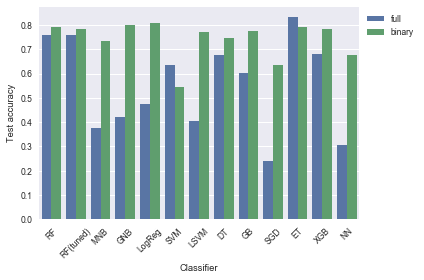

In [129]:
sns.set(font_scale=.85)
sns.set_context(rc={"figure.figsize": (15, 10)})
sns.barplot(x="Classifier", y="Test accuracy", hue="Classification", data=accuraciesdf)
plt.legend(bbox_to_anchor=(1.0, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [78]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

X = all_three_df_location.drop('num', axis = 1)
all_three_df_location['num'] = all_three_df_location['num'].astype(int)

# Split the data into a training and test set.
#Xlr, Xtestlr, ylr, ytestlr = train_test_split(dflog[['Height','Weight']].values, (dflog.Gender == "Male").values,random_state=5)

#clf = LogisticRegression()
# Fit the model on the trainng data.
#clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
#print(accuracy_score(clf.predict(Xtestlr), ytestlr))

CX26_train, CX26_test, cy26_train, cy26_test = train_test_split(X_sm, y_sm, random_state=29)
rfcr = RandomForestRegressor()
rfcr.fit(CX26_train, cy26_train)
print('Basic Random Forest accuracy on training data:',round(rfcr.score(CX26_train, cy26_train),3))
print('Basic Random Forest accuracy on test data:',round(rfcr.score(CX26_test, cy26_test),3))
print(cy26_train)
rfcr_pred = rfcr.predict(CX26_test)
#print(classification_report(cy26_test,rfcr_pred))


Basic Random Forest accuracy on training data: 0.949
Basic Random Forest accuracy on test data: 0.756
[3 3 2 ... 2 3 4]


## Table 9. Individual prediction score and feature contributions using XGBoost on full dataset

In [79]:
#For heart disease presence as the positive signal
#With training xgboost before pred_contribs - so far output very similar

from xgboost import XGBClassifier, DMatrix
test_size = 0.2
Xnp = np.asarray(X)
ynp = np.asarray((all_three_df_location.num >= 1).values)
#ynp = np.asarray(all_three_df_location.num)
y = (all_three_df_location.num >= 1).values

print(Xnp.shape)
#xgbpred = XGBClassifier()
X51_train, X51_test, y51_train, y51_test = train_test_split(Xnp, ynp, test_size=test_size, random_state=29)
xgbpredtrain = XGBClassifier()
xgbpredtrain.fit(X51_train, y51_train)
boostertrain = xgbpredtrain.get_booster()
# Using only a single sample for predict, you can use multiple
test_X51 = [Xnp[0]]

# Wrapping the test X into a DMatrix, need by Booster
predictionstrain = boostertrain.predict(DMatrix(test_X51), pred_contribs=True)

print(predictionstrain.shape)
print(predictionstrain)
print(predictionstrain.sum())

predictionsdf = pd.DataFrame(predictionstrain)
sumpred = predictionstrain.sum()
predictionsdf['sum'] = pd.Series(sumpred, index=predictionsdf.index)
predictionsdf.columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 
                       'slope', 'ca', 'thal', 'Cleveland', 'Hungary', 'Long_Beach', 'bias', 'SUM']
display(HTML(predictionsdf.to_html(index=False)))

predictionssidedf = predictionsdf.T
#sample == 0
predictionssidedf.columns = ['prediction contributions']
display(HTML(predictionssidedf.to_html(index=True)))

(797, 16)
(1, 17)
[[ 5.1797722e-02  2.2679727e-01 -8.4566760e-01  9.9361226e-02
  -1.8565983e-01  8.8251725e-02  2.7043644e-02 -4.9714420e-02
  -5.0916606e-01  5.7031888e-01  7.5837463e-02 -2.6603144e-01
  -1.4579825e-01  0.0000000e+00  2.9049362e-03 -7.9323083e-02
  -6.6065375e-04]]
-0.9397085


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Cleveland,Hungary,Long_Beach,bias,SUM
0.051798,0.226797,-0.845668,0.099361,-0.18566,0.088252,0.027044,-0.049714,-0.509166,0.570319,0.075837,-0.266031,-0.145798,0.0,0.002905,-0.079323,-0.000661,-0.939708


,prediction contributions
age,0.051798
sex,0.226797
cp,-0.845668
trestbps,0.099361
chol,-0.185660
fbs,0.088252
restecg,0.027044
thalach,-0.049714
exang,-0.509166
oldpeak,0.570319


In [136]:
test_size = 0.2
Xnp = np.asarray(X)
ynp = np.asarray((all_three_df_location.num >= 1).values)
ynp_all = np.asarray(all_three_df_location.num)
#y = (all_three_df_location.num >= 1).values

print(Xnp.shape)
#xgbpred = XGBClassifier()
X61_train, X61_test, y61_train, y61_test = train_test_split(Xnp, ynp_all, test_size=test_size, random_state=29)
xgbpredtrainfull = XGBClassifier()
xgbpredtrainfull.fit(X61_train, y61_train)
boostertrainfull = xgbpredtrainfull.get_booster()
# Using only a single sample for predict, you can use multiple
test_X61 = [Xnp[0]]

# Wrapping the test X into a DMatrix, need by Booster
predictionstrainfull = boostertrainfull.predict(DMatrix(test_X61), pred_contribs=True)

print(predictionstrainfull.shape)
print(predictionstrainfull)
print('Prediction of no heart disease:', predictionstrainfull[:,:,0].sum())
print('Prediction of heart disease class 1:', predictionstrainfull[:,:,1].sum())
print('Prediction of heart disease class 2:',predictionstrainfull[:,:,2].sum())
print('Prediction of heart disease class 3:',predictionstrainfull[:,:,3].sum())
print('Prediction of heart disease class 4:',predictionstrainfull[:,:,4].sum())



(797, 16)
(1, 5, 17)
[[[ 3.1873960e-02 -1.6600677e-01  4.3556854e-01 -1.4998774e-01
    2.2301933e-01 -1.4848889e-02 -5.7353927e-03  2.7408912e-03
    3.6655906e-01 -2.4276784e-01 -8.6458534e-02  1.7573807e-01
    3.3938147e-02  0.0000000e+00  0.0000000e+00  5.7164684e-02
    1.5689402e+00]
  [ 2.1229547e-01  6.4120308e-02 -9.2352785e-02 -7.9226613e-02
    1.2037385e-02 -3.6373812e-01  1.6339974e-01 -2.8278703e-02
   -7.9457695e-03 -1.4017028e-01 -4.0484583e-03  6.2625310e-03
   -7.5370356e-02  0.0000000e+00  3.3583734e-03 -9.9387743e-02
    5.6760001e-01]
  [ 2.2178578e-01  2.4610313e-02 -8.4707880e-01  8.0803543e-02
   -1.1494772e-01  3.5961069e-02 -2.0179331e-01  3.2808188e-02
   -5.5187731e-04  1.4525813e-01  3.1039697e-01 -9.2644915e-02
    2.7670769e-04 -4.7979134e-04  1.3955432e-03  0.0000000e+00
    1.9529429e-01]
  [-1.5566373e-01  0.0000000e+00  4.5489933e-02  2.1472163e-01
   -9.3459509e-02  2.2694941e-01 -4.6781506e-03 -1.5889765e-01
   -3.0485673e-02  5.2823448e-01 -3.8911

## Individual prediction score for heart disease presence using SHAP with XGBoost - multiclass

In [19]:
import shap
import xgboost

#binary test with y being true for presence of heart disease
xgb_full = xgboost.DMatrix(X, label=y)
y = (all_three_df_location.num >= 1).values

# create a train/test split
#X50_train, X50_test, y50_train, y50_test = train_test_split(X, y, test_size=0.2, random_state=7)
X_sm_df = pd.DataFrame(X_sm)
X_sm_df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'location_Cleveland', 'location_Hungary', 'location_Long_Beach']
X50_train, X50_test, y50_train, y50_test = train_test_split(X_sm_df, y_sm, test_size=0.2, random_state=7)
xgb50_train = xgboost.DMatrix(X50_train, label=y50_train)
xgb50_test = xgboost.DMatrix(X50_test, label=y50_test)
# use validation set to choose # of trees
#params = {"eta": 0.002,"max_depth": 3,"objective": "survival:cox","subsample": 0.5}
#model_train = xgboost.train(params, xgb_train, 10000, evals = [(xgb_test, "test")], verbose_eval=1000)
#model_train = xgboost.train(xgb50_train, 500, evals = [(xgb50_test, "test")])
#model = xgboost.train(params, xgb_full, 100, evals = [(xgb_full, "test")])



# load JS visualization code to notebook
shap.initjs() 

# train XGBoost model; integer in xgboost.train is number of iterations; 500 and 800 gave same answer. 400, 100 didn't.
#X,y = shap.datasets.boston()
#model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X50_train, label=y50_train), 500)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
shap_values = shap.TreeExplainer(model).shap_values(X)

# visualize the first prediction's explanation
shap.force_plot(shap_values[0,:], X.iloc[0,:])

## Global display of SHAP values with XGBoost (full dataset, multiclass target)

This plot shows an example of one individual's predicted risk of heart disease using this model trained on the full dataset. This particular individual shows a low risk of heart disease based on features shown in this plot (and to a lesser degree other features that have a weak enough influence to not be named in the plot). The low "cp", "exang", and "ca" values, along with the cholesterol level, age, and "slope" value are the features most strongly contributing to a lower risk for this individual. The "thalach", "fbs", "oldpeak" and sex values most strongly contribute to some level of risk for this individual, but on balance this individual's features present a low risk, according to the model. 

In [20]:
#shap.force_plot(shap_values, X)
shap.force_plot(shap_values, X_sm_df)

## Figure 18. Individual prediction score for heart disease presence using SHAP with XGBoost - binary

In [22]:
import shap
import xgboost

#binary test with y being true for presence of heart disease
xgb_full = xgboost.DMatrix(X, label=y)
y = (all_three_df_location.num >= 1).values

# create a train/test split
X50_train, X50_test, y50_train, y50_test = train_test_split(X, y, test_size=0.2, random_state=7)
xgb50_train = xgboost.DMatrix(X50_train, label=y50_train)
xgb50_test = xgboost.DMatrix(X50_test, label=y50_test)
# use validation set to choose # of trees
#params = {"eta": 0.002,"max_depth": 3,"objective": "survival:cox","subsample": 0.5}
#model_train = xgboost.train(params, xgb_train, 10000, evals = [(xgb_test, "test")], verbose_eval=1000)
#model_train = xgboost.train(xgb50_train, 500, evals = [(xgb50_test, "test")])
#model = xgboost.train(params, xgb_full, 100, evals = [(xgb_full, "test")])



# load JS visualization code to notebook
shap.initjs() 

# train XGBoost model; integer in xgboost.train is number of iterations; 500 and 800 gave same answer. 400, 100 didn't.
#X,y = shap.datasets.boston()
#model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X50_train, label=y50_train), 500)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
shap_values = shap.TreeExplainer(model).shap_values(X)

# visualize the first prediction's explanation
shap.force_plot(shap_values[0,:], X.iloc[0,:])

In [23]:
shap.force_plot(shap_values, X)

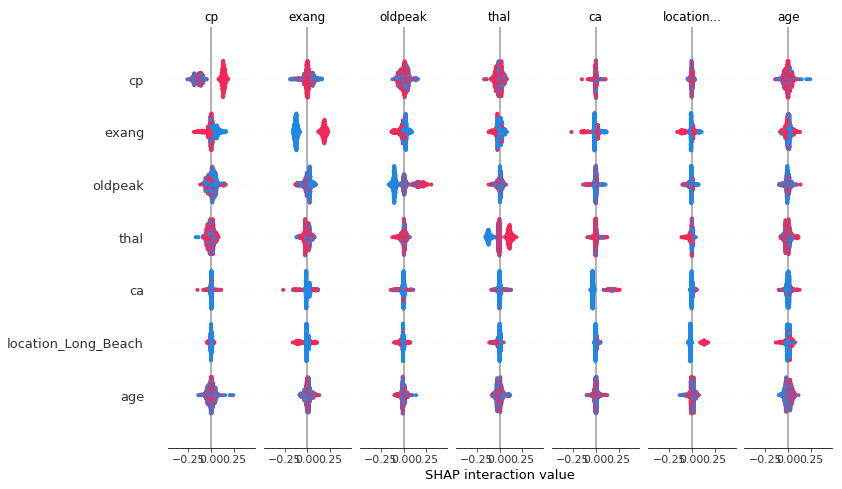

In [24]:
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(X)
shap.summary_plot(shap_interaction_values, X)

## Summary plot of SHAP values with XGBoost and the full dataset (multiclass target)

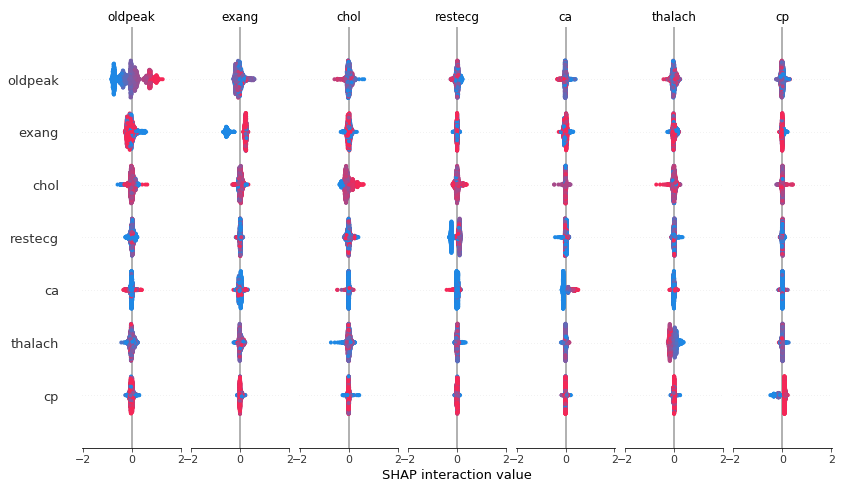

In [21]:
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(X_sm_df)
shap.summary_plot(shap_interaction_values, X_sm_df)

## Figure 20. Summary plot of SHAP values with XGBoost and the full dataset (binary target)

In [ ]:
#shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(X)
#shap.summary_plot(shap_interaction_values, X)

In [ ]:
print(ynp)

## Figure 12. ROC curves for full dataset with a binary target

ROC score for tuned Random Forest model: 0.8675


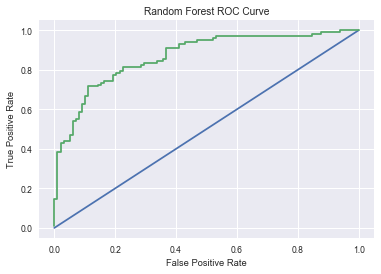

In [90]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_prob = rfccno_tuned.predict_proba(CX4_test)[:,1]
print('ROC score for tuned Random Forest model:', round(roc_auc_score(cy4_test, y_pred_prob),4))
fpr, tpr, thresholds = roc_curve(cy4_test, y_pred_prob)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='Random forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

ROC score for XGBoost model: 0.8707


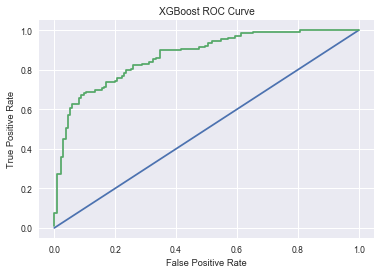

In [91]:
y_pred_probx = xgbno.predict_proba(CX19_test)[:,1]
print('ROC score for XGBoost model:', round(roc_auc_score(cy19_test, y_pred_probx),4))
fpr, tpr, thresholds = roc_curve(cy19_test, y_pred_probx)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.show()

ROC score for Logistic Regression model: 0.8827


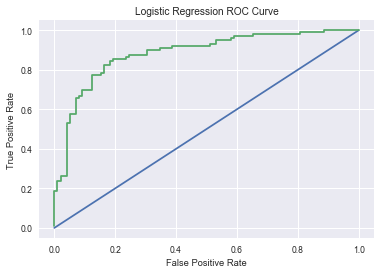

In [92]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_problr = logregcno.predict_proba(CX7_test)[:,1]
print('ROC score for Logistic Regression model:', round(roc_auc_score(cy7_test, y_pred_problr),4))
fpr, tpr, thresholds = roc_curve(cy7_test, y_pred_problr)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()


## Figure 13. Precision-recall curves for full dataset with a binary target

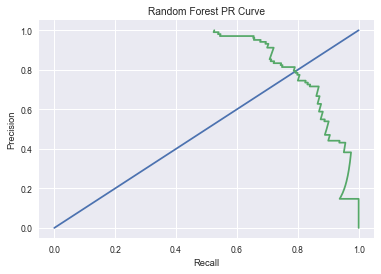

In [93]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

y_pred = rfccno_tuned.predict_proba(CX4_test)[:,1]
p, r, _ = precision_recall_curve(cy4_test, y_pred)

plt.plot([0,1],[0,1])
plt.plot(p,r, label='Random forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest PR Curve')
plt.show()


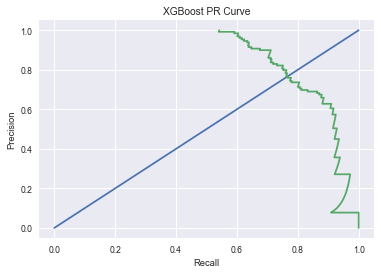

In [94]:
y_predx = xgbno.predict_proba(CX19_test)[:,1]
px, rx, _ = precision_recall_curve(cy19_test, y_predx)

plt.plot([0,1],[0,1])
plt.plot(px,rx, label='XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('XGBoost PR Curve')
plt.show()

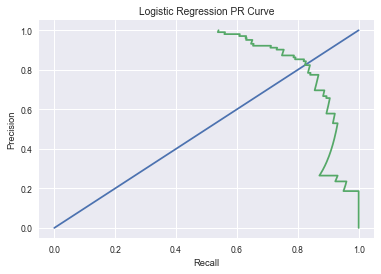

In [95]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

y_predlr = logregcno.predict_proba(CX7_test)[:,1]
plr, rlr, _ = precision_recall_curve(cy7_test, y_predlr)

plt.plot([0,1],[0,1])
plt.plot(plr,rlr, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic Regression PR Curve')
plt.show()

In [7]:
#Retrying XGBoost classifier here
from xgboost import XGBClassifier, plot_importance
test_size = 0.33
X_sm_df = pd.DataFrame(X_sm)
X_sm_df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'location_Cleveland', 'location_Hungary', 'location_Long_Beach']
CX18_train, CX18_test, cy18_train, cy18_test = train_test_split(X_sm_df, y_sm, test_size=test_size, random_state=7)
xgb = XGBClassifier()
xgb.fit(CX18_train, cy18_train)
print(xgb)
cy18_pred = xgb.predict(CX18_test)
predictions1 = [round(value) for value in cy18_pred]
#accuracy = accuracy_score(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('Accuracy on training data:',round(xgb.score(CX18_train, cy18_train),3))
print('Accuracy on test data:',round(xgb.score(CX18_test, cy18_test),3))


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Accuracy on training data: 0.85
Accuracy on test data: 0.665


/Users/vickimoore/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/vickimoore/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/vickimoore/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


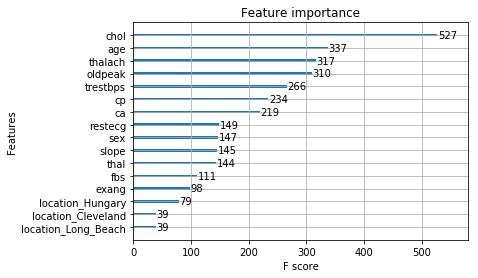

             precision    recall  f1-score   support

          0       0.74      0.84      0.79       142
          1       0.59      0.57      0.58       135
          2       0.51      0.53      0.52       122
          3       0.67      0.60      0.63       139
          4       0.79      0.77      0.78       127

avg / total       0.66      0.66      0.66       665



In [8]:

plot_importance(xgb)
plt.show()
print(classification_report(cy18_test,predictions1))

In [7]:
test_size = 0.33
CX19_train, CX19_test, cy19_train, cy19_test = train_test_split(X, (all_three_df_location.num == 0).values, test_size=test_size, random_state=29)
xgbno = XGBClassifier()
xgbno.fit(CX19_train, cy19_train)
print(xgbno)
cy19_pred = xgbno.predict(CX19_test)
predictions2 = [round(value) for value in cy19_pred]
#accuracy = accuracy_score(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('Accuracy on training data:',round(xgbno.score(CX19_train, cy19_train),3))
print('Accuracy on test data:',round(xgbno.score(CX19_test, cy19_test),3))



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Accuracy on training data: 0.916
Accuracy on test data: 0.784


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


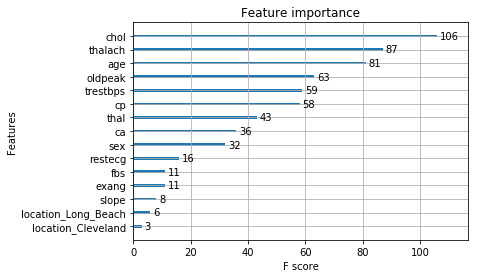

             precision    recall  f1-score   support

      False       0.77      0.83      0.80       135
       True       0.81      0.74      0.77       129

avg / total       0.79      0.78      0.78       264



In [8]:
plot_importance(xgbno)

plt.show()

print(classification_report(cy19_test,predictions2))